<font color="#3D2FB2 " FACE="futura" size =15> **TAXI CHICAGO** </font>

El siguiente notebook contiene la Ingeniería de Variables y modelos de Machine Learning.  
El dataset que se utiliza, es un archivo llamado *'chicago_clean.csv'* al cual se le aplico un proceso de ETL.
Se colocara nuevamente el objetivo del proyecto.

## <font color="#3D2FB2 " FACE="futura" size = 6> **Objetivo principal**</font>

 Con este proyecto se busca predecir el costo total de un viaje por taxi en la ciudad de Chicago, a través de los registros de los viajes que van del 01/01/2023 al 01/08/2023.

## <font color="#3D2FB2 " FACE="futura" size = 6 > **Extracción de los datos**</font>

Se comenzara por la instalación de las dependencias y posteriormente se llamaran a las librerias necesarias para la exploración y análisis del dataset.


**Instalación de las siguientes dependencias**

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install tabulate
# !pip install -U scikit-learn

**Importación de librerias**

In [ ]:
## Importando las librerias necesarias

import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Para observar las columnas completas
pd.set_option('display.max_columns', None)

In [ ]:
# Extracción del dataset y convirtiendo el archivo a DataFrame
data_1= pd.read_csv(r'../content/drive/MyDrive/chicago_clean2.csv')

Comenzamos por visualizar los registros y observar la estructura de los datos

In [ ]:
data_1

,Nuevo_ID,Trip Start Timestamp,Trip Minutes,Trip Seconds,Trip Kilometres,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Trip Speed,Pickup Centroid Location,Dropoff Centroid Location
0,C0001,2023-01-01 00:00:00,17.283333,1037.0,7.75538,6.0,32.0,15.75,3.25,0.0,0.0,19.50,Credit Card,Taxicab Insurance Agency Llc,26.923209,POINT (-87.6559981815 41.9442266014),POINT (-87.6251921424 41.8788655841)
1,C0002,2023-01-01 00:00:00,22.350000,1341.0,26.75767,76.0,8.0,41.50,5.00,0.0,6.0,53.00,Credit Card,Sun Taxi,71.832671,POINT (-87.913624596 41.9802643146),POINT (-87.6333080367 41.899602111)
2,C0003,2023-01-01 00:00:00,14.066667,844.0,6.17856,24.0,8.0,16.14,4.03,0.0,0.0,20.17,Mobile,Sun Taxi,26.354047,POINT (-87.6763559892 41.9012069941),POINT (-87.6333080367 41.899602111)
3,C0004,2023-01-01 00:00:00,6.016667,361.0,1.01367,32.0,32.0,5.50,0.00,0.0,1.0,6.50,Cash,5 Star Taxi,10.108620,POINT (-87.6251921424 41.8788655841),POINT (-87.6251921424 41.8788655841)
4,C0005,2023-01-01 00:00:00,11.733333,704.0,1.59291,14.0,14.0,7.75,0.00,0.0,0.0,7.75,Cash,Flash Cab,8.145563,POINT (-87.7215590627 41.968069),POINT (-87.7215590627 41.968069)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618433,C0403,2023-08-01 00:00:00,26.000000,1560.0,24.29590,76.0,7.0,39.00,8.70,0.0,4.0,51.70,Credit Card,Choice Taxi Association,56.067462,POINT (-87.913624596 41.9802643146),POINT (-87.6494887289 41.9226862843)
3618434,C2462,2023-08-01 00:00:00,17.650000,1059.0,26.43587,76.0,8.0,40.25,8.95,0.0,4.0,53.70,Credit Card,Taxicab Insurance Agency Llc,89.866980,POINT (-87.9030396611 41.9790708201),POINT (-87.6378442095 41.8932163595)
3618435,C2335,2023-08-01 00:00:00,4.700000,282.0,4.81091,76.0,NaN,10.00,3.10,0.0,5.0,18.60,Credit Card,City Service,61.415872,POINT (-87.9030396611 41.9790708201),POINT (-87.8773053996 41.9827750091)
3618436,C1312,2023-08-01 00:00:00,22.000000,1320.0,28.70456,76.0,NaN,44.00,14.80,0.0,29.5,88.80,Credit Card,Sun Taxi,78.285164,POINT (-87.9030396611 41.9790708201),NaN


Verificamos el tipo de datos

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3618438 entries, 0 to 3618437
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Nuevo_ID                    object 
 1   Trip Start Timestamp        object 
 2   Trip Minutes                float64
 3   Trip Seconds                float64
 4   Trip Kilometres             float64
 5   Pickup Community Area       float64
 6   Dropoff Community Area      float64
 7   Fare                        float64
 8   Tips                        float64
 9   Tolls                       float64
 10  Extras                      float64
 11  Trip Total                  float64
 12  Payment Type                object 
 13  Company                     object 
 14  Trip Speed                  float64
 15  Pickup Centroid Location    object 
 16  Dropoff Centroid  Location  object 
dtypes: float64(11), object(6)
memory usage: 469.3+ MB




### <font color="#3D2FB2 " FACE="futura" size = 5 > **Cambio de formato a datetime en las columnas 'Trip Start Timestamp' y 'Trip End Timestamp'**

---



De lo anterior detectamos que debemos cambiar el formato la columna 'Trip Start Timestamp' a datetime, se realizará el cambio de formato.

In [ ]:
# Realizo una copia para trabajar con el dataset
taxi = data_1.copy()

In [ ]:
# El formato esta de la siguiente manera : 03/02/2023 04:45:00 PM y como tipo objeto
#cambiando formato
taxi['Trip Start Timestamp']= pd.to_datetime(taxi['Trip Start Timestamp'])


# Verificando el cambio de formato en las columnas 'Trip Start Timestamp' y 'Trip End Timestamp'
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3618438 entries, 0 to 3618437
Data columns (total 17 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Nuevo_ID                    object        
 1   Trip Start Timestamp        datetime64[ns]
 2   Trip Minutes                float64       
 3   Trip Seconds                float64       
 4   Trip Kilometres             float64       
 5   Pickup Community Area       float64       
 6   Dropoff Community Area      float64       
 7   Fare                        float64       
 8   Tips                        float64       
 9   Tolls                       float64       
 10  Extras                      float64       
 11  Trip Total                  float64       
 12  Payment Type                object        
 13  Company                     object        
 14  Trip Speed                  float64       
 15  Pickup Centroid Location    object        
 16  Dropoff Centroid  

## <font color="#3D2FB2 " FACE="futura" size = 6 > **Ingeniería de variables**</font>

En este paso, se comenzara obteniendo la codificación de las variables categóricas. A partir, de validar correlaciones se determinara la importancia de las variables y de esta manera se tomaran aquellas variables que presenten una mejor relación con nuestra variable objetivo.

### <font color="#3D2FB2 " FACE="futura" size = 5 > **Transformación de variables categóricas**

---

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Aplicar la codificación one-hot a la columna 'Tipo de Pago'
df_encoded = pd.get_dummies(taxi, columns=['Payment Type'], prefix=['Pago'])

In [ ]:
# Generando matriz de coorrelación
select_pago = df_encoded[[ 'Trip Total','Pago_Cash',
       'Pago_Credit Card', 'Pago_Dispute', 'Pago_Mobile', 'Pago_No Charge',
       'Pago_Prcard', 'Pago_Unknown']]

In [ ]:
## Obteneniendo las correlaciones
corr_pago= select_pago.corr()
corr_pago.style.background_gradient(cmap= 'YlOrBr')

,Trip Total,Pago_Cash,Pago_Credit Card,Pago_Dispute,Pago_Mobile,Pago_No Charge,Pago_Prcard,Pago_Unknown
Trip Total,1.000000,-0.226485,0.363622,0.001444,-0.167392,0.011522,-0.023909,-0.043129
Pago_Cash,-0.226485,1.000000,-0.514655,-0.009634,-0.269322,-0.011840,-0.210745,-0.138750
Pago_Credit Card,0.363622,-0.514655,1.000000,-0.013054,-0.364920,-0.016043,-0.285550,-0.188000
Pago_Dispute,0.001444,-0.009634,-0.013054,1.000000,-0.006831,-0.000300,-0.005345,-0.003519
Pago_Mobile,-0.167392,-0.269322,-0.364920,-0.006831,1.000000,-0.008395,-0.149430,-0.098381
Pago_No Charge,0.011522,-0.011840,-0.016043,-0.000300,-0.008395,1.000000,-0.006569,-0.004325
Pago_Prcard,-0.023909,-0.210745,-0.285550,-0.005345,-0.149430,-0.006569,1.000000,-0.076984
Pago_Unknown,-0.043129,-0.138750,-0.188000,-0.003519,-0.098381,-0.004325,-0.076984,1.000000


In [ ]:
# Aplicar la codificación one-hot a la columna 'Pickup Community Area'
df_encoded_pickup = pd.get_dummies(df_encoded, columns=['Pickup Community Area'], prefix=['Area'])

Se tienen  en total 77 áreas y recordando de nuestro análisis anterior, hay diez áreas que cocentran la mayoría de los ascensos. En esta ocasión analizaremos las 15 localidades con mas paradas.


In [ ]:
ascenso_area = taxi['Pickup Community Area'].value_counts()
ascenso_area.head(15)

8.0     790027
76.0    752716
32.0    593380
28.0    330235
33.0    142391
56.0    126934
6.0     125652
7.0      77433
3.0      55196
77.0     41756
24.0     35961
2.0      25865
41.0     24566
1.0      20105
35.0     19485
Name: Pickup Community Area, dtype: int64

De lo anterior solo se realizaran las correlaciones para  15 áreas y observar la influencia que se tiene sobre el costo total del viaje.

In [ ]:
# Generando maktriz de correlaciones para las community área
select_area = df_encoded_pickup[['Trip Total','Area_8.0', 'Area_76.0', 'Area_32.0',
       'Area_28.0', 'Area_33.0', 'Area_6.0', 'Area_56.0', 'Area_7.0',
       'Area_3.0', 'Area_77.0', 'Area_24.0', 'Area_2.0', 'Area_41.0', 'Area_1.0', 'Area_35.0']]

In [ ]:
## Obtneniendo las correlaciones
corr_pickup= select_area.corr()
corr_pickup.style.background_gradient(cmap= 'YlOrBr')

,Trip Total,Area_8.0,Area_76.0,Area_32.0,Area_28.0,Area_33.0,Area_6.0,Area_56.0,Area_7.0,Area_3.0,Area_77.0,Area_24.0,Area_2.0,Area_41.0,Area_1.0,Area_35.0
Trip Total,1.000000,-0.266259,0.621209,-0.214859,-0.178644,-0.044306,-0.076610,0.156079,-0.065995,-0.046119,-0.032743,-0.033323,-0.013844,-0.008157,-0.010861,-0.018227
Area_8.0,-0.266259,1.000000,-0.270862,-0.234072,-0.167487,-0.106967,-0.100242,-0.100770,-0.078154,-0.065778,-0.057104,-0.052951,-0.044844,-0.043695,-0.039505,-0.038888
Area_76.0,0.621209,-0.270862,1.000000,-0.226986,-0.162417,-0.103728,-0.097207,-0.097720,-0.075788,-0.063787,-0.055376,-0.051348,-0.043486,-0.042373,-0.038309,-0.037710
Area_32.0,-0.214859,-0.234072,-0.226986,1.000000,-0.140356,-0.089639,-0.084004,-0.084447,-0.065494,-0.055123,-0.047854,-0.044374,-0.037580,-0.036617,-0.033106,-0.032588
Area_28.0,-0.178644,-0.167487,-0.162417,-0.140356,1.000000,-0.064140,-0.060108,-0.060425,-0.046863,-0.039442,-0.034241,-0.031751,-0.026890,-0.026201,-0.023688,-0.023318
Area_33.0,-0.044306,-0.106967,-0.103728,-0.089639,-0.064140,1.000000,-0.038388,-0.038591,-0.029929,-0.025190,-0.021868,-0.020278,-0.017173,-0.016733,-0.015129,-0.014892
Area_6.0,-0.076610,-0.100242,-0.097207,-0.084004,-0.060108,-0.038388,1.000000,-0.036164,-0.028048,-0.023606,-0.020494,-0.019003,-0.016094,-0.015681,-0.014178,-0.013956
Area_56.0,0.156079,-0.100770,-0.097720,-0.084447,-0.060425,-0.038591,-0.036164,1.000000,-0.028196,-0.023731,-0.020602,-0.019103,-0.016178,-0.015764,-0.014252,-0.014030
Area_7.0,-0.065995,-0.078154,-0.075788,-0.065494,-0.046863,-0.029929,-0.028048,-0.028196,1.000000,-0.018405,-0.015978,-0.014816,-0.012547,-0.012226,-0.011054,-0.010881
Area_3.0,-0.046119,-0.065778,-0.063787,-0.055123,-0.039442,-0.025190,-0.023606,-0.023731,-0.018405,1.000000,-0.013448,-0.012470,-0.010561,-0.010290,-0.009303,-0.009158


De lo anterior, se detecta lo siguiente que las áreas 76 y 56 tienen mayor influencia sobre el costo total del viaje (en estas dos áreas se encuentran ubicados el aeropuerto de O 'Hare y Midway), por lo que se decide crear una nueva variable de 0 y 1. Donde 1, indica que la parada se hizo en esas áreas y 0, lo contrario.

In [ ]:
df_encoded.columns

Index(['Nuevo_ID', 'Trip Start Timestamp', 'Trip Minutes', 'Trip Seconds',
       'Trip Kilometres', 'Pickup Community Area', 'Dropoff Community Area',
       'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total', 'Company',
       'Trip Speed', 'Pickup Centroid Location', 'Dropoff Centroid  Location',
       'Pago_Cash', 'Pago_Credit Card', 'Pago_Dispute', 'Pago_Mobile',
       'Pago_No Charge', 'Pago_Prcard', 'Pago_Unknown'],
      dtype='object')

In [ ]:
# Cambiando valores por 0 y 1
df_encoded['Airport_Pickup'] = df_encoded['Pickup Community Area'].apply(lambda x: 1 if x ==76.0 or x == 56.0  else 0)

In [ ]:
df_encoded[['Pickup Community Area', 'Airport_Pickup']]

,Pickup Community Area,Airport_Pickup
0,6.0,0
1,76.0,1
2,24.0,0
3,32.0,0
4,14.0,0
...,...,...
3618433,76.0,1
3618434,76.0,1
3618435,76.0,1
3618436,76.0,1


In [ ]:
df_encoded.columns

Index(['Nuevo_ID', 'Trip Start Timestamp', 'Trip Minutes', 'Trip Seconds',
       'Trip Kilometres', 'Pickup Community Area', 'Dropoff Community Area',
       'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total', 'Company',
       'Trip Speed', 'Pickup Centroid Location', 'Dropoff Centroid  Location',
       'Pago_Cash', 'Pago_Credit Card', 'Pago_Dispute', 'Pago_Mobile',
       'Pago_No Charge', 'Pago_Prcard', 'Pago_Unknown', 'Airport_Pickup'],
      dtype='object')

### <font color="#3D2FB2 " FACE="futura" size = 5 > **Obtención de variable objetivo**

---

Se seleccionan las columnas para ingresar al modelo

In [ ]:
# Se tomaran las siguientes columnas para el modelo
data_model = df_encoded[['Nuevo_ID', 'Trip Start Timestamp','Trip Seconds', 'Trip Kilometres', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Pago_Cash', 'Pago_Credit Card','Pago_Mobile','Airport_Pickup']]

In [ ]:
# Partiendo del siguiente dataset
data_model

,Nuevo_ID,Trip Start Timestamp,Trip Seconds,Trip Kilometres,Fare,Tips,Tolls,Extras,Trip Total,Pago_Cash,Pago_Credit Card,Pago_Mobile,Airport_Pickup
0,C0001,2023-01-01,1037.0,7.75538,15.75,3.25,0.0,0.0,19.50,0,1,0,0
1,C0002,2023-01-01,1341.0,26.75767,41.50,5.00,0.0,6.0,53.00,0,1,0,1
2,C0003,2023-01-01,844.0,6.17856,16.14,4.03,0.0,0.0,20.17,0,0,1,0
3,C0004,2023-01-01,361.0,1.01367,5.50,0.00,0.0,1.0,6.50,1,0,0,0
4,C0005,2023-01-01,704.0,1.59291,7.75,0.00,0.0,0.0,7.75,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618433,C0403,2023-08-01,1560.0,24.29590,39.00,8.70,0.0,4.0,51.70,0,1,0,1
3618434,C2462,2023-08-01,1059.0,26.43587,40.25,8.95,0.0,4.0,53.70,0,1,0,1
3618435,C2335,2023-08-01,282.0,4.81091,10.00,3.10,0.0,5.0,18.60,0,1,0,1
3618436,C1312,2023-08-01,1320.0,28.70456,44.00,14.80,0.0,29.5,88.80,0,1,0,1


In [ ]:
data_model.columns

Index(['Nuevo_ID', 'Trip Start Timestamp', 'Trip Seconds', 'Trip Kilometres',
       'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total', 'Pago_Cash',
       'Pago_Credit Card', 'Pago_Mobile', 'Airport_Pickup'],
      dtype='object')

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Agrupando datos por taxi**

---

Comenzamos ordenando los datos por la fecha

In [ ]:
# Ordenar los datos por la columna 'Fecha'
data_model.sort_values(by='Trip Start Timestamp', inplace=True)

<ipython-input-25-5292df872472>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.sort_values(by='Trip Start Timestamp', inplace=True)


In [ ]:
data_model

,Nuevo_ID,Trip Start Timestamp,Trip Seconds,Trip Kilometres,Fare,Tips,Tolls,Extras,Trip Total,Pago_Cash,Pago_Credit Card,Pago_Mobile,Airport_Pickup
0,C0001,2023-01-01,1037.0,7.75538,15.75,3.25,0.0,0.0,19.50,0,1,0,0
63,C0004,2023-01-01,361.0,1.01367,5.50,0.00,0.0,1.0,6.50,1,0,0,0
62,C0047,2023-01-01,540.0,1.44810,6.75,1.00,0.0,2.0,9.75,0,1,0,0
61,C0046,2023-01-01,1012.0,9.97580,18.50,0.00,0.0,0.0,18.50,1,0,0,0
60,C0045,2023-01-01,351.0,0.35398,5.00,0.00,0.0,3.5,8.50,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618413,C0589,2023-08-01,300.0,2.09170,6.75,3.00,0.0,1.0,10.75,0,1,0,0
3618411,C2230,2023-08-01,1437.0,27.07947,41.75,9.25,0.0,4.0,55.50,0,1,0,1
3618436,C1312,2023-08-01,1320.0,28.70456,44.00,14.80,0.0,29.5,88.80,0,1,0,1
3618423,C1015,2023-08-01,1320.0,1.44810,38.50,4.00,0.0,4.0,46.50,0,1,0,1


In [ ]:
# Confirmamos que la columna que proporciona la fecha esta en el formato correcto '2023-07-31 23:00:00'
data_model['Trip Start Timestamp'] = pd.to_datetime(data_model['Trip Start Timestamp'], format='%Y-%m-%d %H:%M:%S')


<ipython-input-27-8c7c59a5e4df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['Trip Start Timestamp'] = pd.to_datetime(data_model['Trip Start Timestamp'], format='%Y-%m-%d %H:%M:%S')


Al obtener las etiquetas para los días de la semana se detecta que el 1ro de enero cae en domingo, por lo que se genera una función que consire el inicio de de semana desde el domingo y no desde el lunes.


In [ ]:
# Función para obtener el número de semana comenzando desde el domingo
def numero_semana_sunday(fecha):
    return fecha.isocalendar()[1] if fecha.weekday() != 6 else 1

# Aplica la función a cada fila de la columna 'fecha' y almacena el resultado en una nueva columna 'numero_semana'
data_model['Semana_D'] = data_model['Trip Start Timestamp'].apply(numero_semana_sunday)


<ipython-input-28-cbfb26b823ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['Semana_D'] = data_model['Trip Start Timestamp'].apply(numero_semana_sunday)


In [ ]:
#Verificamos que la etiqueta se haya generado de forma correcta
data_model

,Nuevo_ID,Trip Start Timestamp,Trip Seconds,Trip Kilometres,Fare,Tips,Tolls,Extras,Trip Total,Pago_Cash,Pago_Credit Card,Pago_Mobile,Airport_Pickup,Semana_D
0,C0001,2023-01-01,1037.0,7.75538,15.75,3.25,0.0,0.0,19.50,0,1,0,0,1
63,C0004,2023-01-01,361.0,1.01367,5.50,0.00,0.0,1.0,6.50,1,0,0,0,1
62,C0047,2023-01-01,540.0,1.44810,6.75,1.00,0.0,2.0,9.75,0,1,0,0,1
61,C0046,2023-01-01,1012.0,9.97580,18.50,0.00,0.0,0.0,18.50,1,0,0,0,1
60,C0045,2023-01-01,351.0,0.35398,5.00,0.00,0.0,3.5,8.50,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618413,C0589,2023-08-01,300.0,2.09170,6.75,3.00,0.0,1.0,10.75,0,1,0,0,31
3618411,C2230,2023-08-01,1437.0,27.07947,41.75,9.25,0.0,4.0,55.50,0,1,0,1,31
3618436,C1312,2023-08-01,1320.0,28.70456,44.00,14.80,0.0,29.5,88.80,0,1,0,1,31
3618423,C1015,2023-08-01,1320.0,1.44810,38.50,4.00,0.0,4.0,46.50,0,1,0,1,31


In [ ]:
## Verificamos las columnas generadas en el DataFrame
data_model.columns

Index(['Nuevo_ID', 'Trip Start Timestamp', 'Trip Seconds', 'Trip Kilometres',
       'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total', 'Pago_Cash',
       'Pago_Credit Card', 'Pago_Mobile', 'Airport_Pickup', 'Semana_D'],
      dtype='object')

Se obtendran variables adicionales que se pueden agregar al modelo. Las cuales consistiran en lo siguiente.   
**Recordando que la tarifa cambia de acuerdo a ciertas criterios los cuales son:**   
**Por cada milla que avanza el taxi se cobra 2.25**  
**Por cada 36 seg se cobra 0.20**

Se lo anterior se multiplicara la columnas de distancia y tiempo, para obtener los valores que corresponden a la tarifa.  
Se analizara si colocar una columna que tenga el dato de inicio de tarifa o se decidira si inluirlo en alguna de las variables, ya que es un valor constante en el valor del viaje del taxi.


In [ ]:
#Se creara la columna de millas, para poder obtner el costo del viaje en kilometros
data_model_agg = data_model.copy()

Se obtienen nuevas variables, 'Fmile' correspondera cal cálculo de las millas por la tarifa de 2.25, esta es tomada de la información de las placas de los taxis.    
La variable 'Fsec' se obtiene al mutiplicar los segundos que dura el viaje por la tarifa de 0.20.   

In [ ]:
data_model_agg['Fmile']= (data_model_agg['Trip Kilometres']*0.621371)*2.25
data_model_agg['Fsec']= (data_model_agg['Trip Seconds']/36)*0.20

In [ ]:
data_model_agg

,Nuevo_ID,Trip Start Timestamp,Trip Seconds,Trip Kilometres,Fare,Tips,Tolls,Extras,Trip Total,Pago_Cash,Pago_Credit Card,Pago_Mobile,Airport_Pickup,Semana_D,Fmile,Fsec
0,C0001,2023-01-01,1037.0,7.75538,15.75,3.25,0.0,0.0,19.50,0,1,0,0,1,10.842679,5.761111
63,C0004,2023-01-01,361.0,1.01367,5.50,0.00,0.0,1.0,6.50,1,0,0,0,1,1.417197,2.005556
62,C0047,2023-01-01,540.0,1.44810,6.75,1.00,0.0,2.0,9.75,0,1,0,0,1,2.024567,3.000000
61,C0046,2023-01-01,1012.0,9.97580,18.50,0.00,0.0,0.0,18.50,1,0,0,0,1,13.947014,5.622222
60,C0045,2023-01-01,351.0,0.35398,5.00,0.00,0.0,3.5,8.50,1,0,0,0,1,0.494894,1.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618413,C0589,2023-08-01,300.0,2.09170,6.75,3.00,0.0,1.0,10.75,0,1,0,0,31,2.924374,1.666667
3618411,C2230,2023-08-01,1437.0,27.07947,41.75,9.25,0.0,4.0,55.50,0,1,0,1,31,37.859394,7.983333
3618436,C1312,2023-08-01,1320.0,28.70456,44.00,14.80,0.0,29.5,88.80,0,1,0,1,31,40.131408,7.333333
3618423,C1015,2023-08-01,1320.0,1.44810,38.50,4.00,0.0,4.0,46.50,0,1,0,1,31,2.024567,7.333333


Se calculara en términos del porcentaje de la columna 'Total' las columnas  'Fare', 'Tips', 'Tolls' y 'Extras'que representa las columnas de los costos del viaje.

In [ ]:
## Calculando las columnas de porcentaje 'Fare', 'Tips', 'Tolls' y 'Extras'
data_model_agg['PFare']= (data_model_agg['Fare']/data_model_agg['Trip Total'])
data_model_agg['PTips']= (data_model_agg[ 'Tips']/data_model_agg['Trip Total'])
data_model_agg['PTolls']= (data_model_agg['Tolls']/data_model_agg['Trip Total'])
data_model_agg['PExtras']= (data_model_agg['Extras']/data_model_agg['Trip Total'])

In [ ]:
data_model_agg

,Nuevo_ID,Trip Start Timestamp,Trip Seconds,Trip Kilometres,Fare,Tips,Tolls,Extras,Trip Total,Pago_Cash,Pago_Credit Card,Pago_Mobile,Airport_Pickup,Semana_D,Fmile,Fsec,PFare,PTips,PTolls,PExtras
0,C0001,2023-01-01,1037.0,7.75538,15.75,3.25,0.0,0.0,19.50,0,1,0,0,1,10.842679,5.761111,0.807692,0.166667,0.0,0.000000
63,C0004,2023-01-01,361.0,1.01367,5.50,0.00,0.0,1.0,6.50,1,0,0,0,1,1.417197,2.005556,0.846154,0.000000,0.0,0.153846
62,C0047,2023-01-01,540.0,1.44810,6.75,1.00,0.0,2.0,9.75,0,1,0,0,1,2.024567,3.000000,0.692308,0.102564,0.0,0.205128
61,C0046,2023-01-01,1012.0,9.97580,18.50,0.00,0.0,0.0,18.50,1,0,0,0,1,13.947014,5.622222,1.000000,0.000000,0.0,0.000000
60,C0045,2023-01-01,351.0,0.35398,5.00,0.00,0.0,3.5,8.50,1,0,0,0,1,0.494894,1.950000,0.588235,0.000000,0.0,0.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618413,C0589,2023-08-01,300.0,2.09170,6.75,3.00,0.0,1.0,10.75,0,1,0,0,31,2.924374,1.666667,0.627907,0.279070,0.0,0.093023
3618411,C2230,2023-08-01,1437.0,27.07947,41.75,9.25,0.0,4.0,55.50,0,1,0,1,31,37.859394,7.983333,0.752252,0.166667,0.0,0.072072
3618436,C1312,2023-08-01,1320.0,28.70456,44.00,14.80,0.0,29.5,88.80,0,1,0,1,31,40.131408,7.333333,0.495495,0.166667,0.0,0.332207
3618423,C1015,2023-08-01,1320.0,1.44810,38.50,4.00,0.0,4.0,46.50,0,1,0,1,31,2.024567,7.333333,0.827957,0.086022,0.0,0.086022


Comenzaremos con el agrupamiento de los datos, se decidio  mantener las columnas que contengan valores numéricos. **Debido a que cada taxi puede tener varios viajes a lo largo de un día, y esto se puede replicar a la semana, se tomara el costo total del promedio de sus  viajes en cada categoría para cada taxi, agrupando los viajes por semana**

In [ ]:
data_model_agg.columns

Index(['Nuevo_ID', 'Trip Start Timestamp', 'Trip Seconds', 'Trip Kilometres',
       'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total', 'Pago_Cash',
       'Pago_Credit Card', 'Pago_Mobile', 'Airport_Pickup', 'Semana_D',
       'Fmile', 'Fsec', 'PFare', 'PTips', 'PTolls', 'PExtras'],
      dtype='object')

In [ ]:
## Agrupando por taxi y semana
group_taxi = data_model_agg.groupby(['Nuevo_ID','Semana_D' ]).agg({
    'Trip Seconds':'mean',
    'Trip Kilometres':'mean',
    'Fare':'mean',
    'Tips':'mean',
    'Tolls':'mean',
    'Extras':'mean',
    'Fmile':'mean', 'Fsec':'mean', 'PFare':'mean', 'PTips':'mean', 'PTolls':'mean', 'PExtras':'mean',
    'Trip Total':'mean'}).sort_values(by='Semana_D', ascending=True).reset_index()

In [ ]:
group_taxi

,Nuevo_ID,Semana_D,Trip Seconds,Trip Kilometres,Fare,Tips,Tolls,Extras,Fmile,Fsec,PFare,PTips,PTolls,PExtras,Trip Total
0,C0001,1,1177.895105,17.729830,29.158462,4.751818,0.000000,4.415385,24.787805,6.543862,0.763107,0.119232,0.000000,0.107585,38.661329
1,C1943,1,654.893617,4.337453,10.707447,0.694681,0.000000,0.329787,6.064127,3.638298,0.909837,0.061082,0.000000,0.029081,11.731915
2,C0400,1,967.196787,11.856004,26.365462,3.943614,0.000000,1.608434,16.575698,5.373315,0.819587,0.114808,0.000000,0.052649,32.190602
3,C1942,1,1002.377982,12.352721,28.312550,0.297817,0.000000,0.469725,17.270151,5.568767,0.971780,0.014437,0.000000,0.012438,29.096606
4,C1941,1,1154.739726,14.467775,25.602740,4.456438,0.271233,4.214247,20.227176,6.415221,0.802827,0.112359,0.003652,0.080299,34.558356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73914,C0462,31,149.000000,0.563150,4.375000,1.000000,0.000000,0.000000,0.787331,0.827778,0.838710,0.129032,0.000000,0.000000,5.625000
73915,C1858,31,1127.142857,9.214973,17.750000,3.157143,0.000000,2.142857,12.883313,6.261905,0.784090,0.128821,0.000000,0.069912,23.335714
73916,C1151,31,1076.000000,12.306168,21.791667,2.453333,0.000000,1.583333,17.205066,5.977778,0.844867,0.105952,0.000000,0.029126,26.161667
73917,C0775,31,2310.000000,26.669175,42.000000,6.937500,0.000000,4.500000,37.285767,12.833333,0.788780,0.125934,0.000000,0.085286,53.437500


In [ ]:
# Asegurando que la columna 'Semana_D' sea de tipo int para que funcione como índice
group_taxi['Semana_D'] = group_taxi['Semana_D'].astype(int)


Se obtiene la tabla donde se asocia el ID del taxi asociada a la semana y el promedio de las variables que se tomaran para ingresar al modelo.

In [ ]:
group_taxi

,Nuevo_ID,Semana_D,Trip Seconds,Trip Kilometres,Fare,Tips,Tolls,Extras,Fmile,Fsec,PFare,PTips,PTolls,PExtras,Trip Total
0,C0001,1,1177.895105,17.729830,29.158462,4.751818,0.000000,4.415385,24.787805,6.543862,0.763107,0.119232,0.000000,0.107585,38.661329
1,C1943,1,654.893617,4.337453,10.707447,0.694681,0.000000,0.329787,6.064127,3.638298,0.909837,0.061082,0.000000,0.029081,11.731915
2,C0400,1,967.196787,11.856004,26.365462,3.943614,0.000000,1.608434,16.575698,5.373315,0.819587,0.114808,0.000000,0.052649,32.190602
3,C1942,1,1002.377982,12.352721,28.312550,0.297817,0.000000,0.469725,17.270151,5.568767,0.971780,0.014437,0.000000,0.012438,29.096606
4,C1941,1,1154.739726,14.467775,25.602740,4.456438,0.271233,4.214247,20.227176,6.415221,0.802827,0.112359,0.003652,0.080299,34.558356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73914,C0462,31,149.000000,0.563150,4.375000,1.000000,0.000000,0.000000,0.787331,0.827778,0.838710,0.129032,0.000000,0.000000,5.625000
73915,C1858,31,1127.142857,9.214973,17.750000,3.157143,0.000000,2.142857,12.883313,6.261905,0.784090,0.128821,0.000000,0.069912,23.335714
73916,C1151,31,1076.000000,12.306168,21.791667,2.453333,0.000000,1.583333,17.205066,5.977778,0.844867,0.105952,0.000000,0.029126,26.161667
73917,C0775,31,2310.000000,26.669175,42.000000,6.937500,0.000000,4.500000,37.285767,12.833333,0.788780,0.125934,0.000000,0.085286,53.437500



## <font color="#3D2FB2 " FACE="futura" size = 6 > **Umbral a 28 semanas**</font>

Se toma la decisión de establecer un umbral de 28 semanas para tomar aquellos taxis que hayan trabajado este periodo como mínimo. Esto debido al desempeño de los modelos sin considerar esta situación, ya que existen taxis que solo han trabajado una semana y esto provoca que se tengan valores en cero en muchos casos.
De lo anterior detectamos que los valores que tenemos en cero, corresponden a los valores de la semana en donde algunos de los taxis no trabajaron o quiza se reincorporaron; y esto podrían estan influyendo en el desempeño de los modelos.



In [ ]:
## Retomando el dataset antes de reestructurar las columnas por semana
group_taxi

,Nuevo_ID,Semana_D,Trip Seconds,Trip Kilometres,Fare,Tips,Tolls,Extras,Fmile,Fsec,PFare,PTips,PTolls,PExtras,Trip Total
0,C0001,1,1177.895105,17.729830,29.158462,4.751818,0.000000,4.415385,24.787805,6.543862,0.763107,0.119232,0.000000,0.107585,38.661329
1,C1943,1,654.893617,4.337453,10.707447,0.694681,0.000000,0.329787,6.064127,3.638298,0.909837,0.061082,0.000000,0.029081,11.731915
2,C0400,1,967.196787,11.856004,26.365462,3.943614,0.000000,1.608434,16.575698,5.373315,0.819587,0.114808,0.000000,0.052649,32.190602
3,C1942,1,1002.377982,12.352721,28.312550,0.297817,0.000000,0.469725,17.270151,5.568767,0.971780,0.014437,0.000000,0.012438,29.096606
4,C1941,1,1154.739726,14.467775,25.602740,4.456438,0.271233,4.214247,20.227176,6.415221,0.802827,0.112359,0.003652,0.080299,34.558356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73914,C0462,31,149.000000,0.563150,4.375000,1.000000,0.000000,0.000000,0.787331,0.827778,0.838710,0.129032,0.000000,0.000000,5.625000
73915,C1858,31,1127.142857,9.214973,17.750000,3.157143,0.000000,2.142857,12.883313,6.261905,0.784090,0.128821,0.000000,0.069912,23.335714
73916,C1151,31,1076.000000,12.306168,21.791667,2.453333,0.000000,1.583333,17.205066,5.977778,0.844867,0.105952,0.000000,0.029126,26.161667
73917,C0775,31,2310.000000,26.669175,42.000000,6.937500,0.000000,4.500000,37.285767,12.833333,0.788780,0.125934,0.000000,0.085286,53.437500


Comenzaremos contabilizando la cantidad de taxis que trabajaron todas las semanas hasta los que solo trabajaron unsa sola semana.

In [ ]:
## Creamos un ciclo que indique la cantidad de semanas en los que trabajan los taxis
for i in range(0, 32):
  print(f'Cantidad de taxis que solo trabajaron {i} semana : {(group_taxi.Nuevo_ID.value_counts() == i).sum()}')


Cantidad de taxis que solo trabajaron 0 semana : 0
Cantidad de taxis que solo trabajaron 1 semana : 63
Cantidad de taxis que solo trabajaron 2 semana : 18
Cantidad de taxis que solo trabajaron 3 semana : 23
Cantidad de taxis que solo trabajaron 4 semana : 26
Cantidad de taxis que solo trabajaron 5 semana : 24
Cantidad de taxis que solo trabajaron 6 semana : 30
Cantidad de taxis que solo trabajaron 7 semana : 19
Cantidad de taxis que solo trabajaron 8 semana : 25
Cantidad de taxis que solo trabajaron 9 semana : 24
Cantidad de taxis que solo trabajaron 10 semana : 23
Cantidad de taxis que solo trabajaron 11 semana : 23
Cantidad de taxis que solo trabajaron 12 semana : 21
Cantidad de taxis que solo trabajaron 13 semana : 26
Cantidad de taxis que solo trabajaron 14 semana : 34
Cantidad de taxis que solo trabajaron 15 semana : 31
Cantidad de taxis que solo trabajaron 16 semana : 32
Cantidad de taxis que solo trabajaron 17 semana : 47
Cantidad de taxis que solo trabajaron 18 semana : 50
Cant

In [ ]:
group_taxi.Nuevo_ID.nunique()

2949

La mitad de las unidades son 1594 unidades. Si tomamos los taxis que trabajaron como mínimo 28 semanas, tendriamos un total de 1743 unidades que cumplen con esta condición.
Se filtrara el DataFrame y se ingresara al modelo para verificar si existen cambios en el modelo.

In [ ]:
group_taxi.columns

Index(['Nuevo_ID', 'Semana_D', 'Trip Seconds', 'Trip Kilometres', 'Fare',
       'Tips', 'Tolls', 'Extras', 'Fmile', 'Fsec', 'PFare', 'PTips', 'PTolls',
       'PExtras', 'Trip Total'],
      dtype='object')

In [ ]:
# Calcula la cuenta de cada valor en la columna Nuevo_ID
counts = group_taxi['Nuevo_ID'].value_counts()

# Encuentra los valores de Nuevo_ID que aparecen más de 28 veces
frequent_ids = counts[counts >= 28].index.tolist()

# Filtra el DataFrame usando los valores de Nuevo_ID frecuentes
filter_28W = group_taxi[group_taxi['Nuevo_ID'].isin(frequent_ids)]



In [ ]:
filter_28W

,Nuevo_ID,Semana_D,Trip Seconds,Trip Kilometres,Fare,Tips,Tolls,Extras,Fmile,Fsec,PFare,PTips,PTolls,PExtras,Trip Total
0,C0001,1,1177.895105,17.729830,29.158462,4.751818,0.000000,4.415385,24.787805,6.543862,0.763107,0.119232,0.000000,0.107585,38.661329
2,C0400,1,967.196787,11.856004,26.365462,3.943614,0.000000,1.608434,16.575698,5.373315,0.819587,0.114808,0.000000,0.052649,32.190602
3,C1942,1,1002.377982,12.352721,28.312550,0.297817,0.000000,0.469725,17.270151,5.568767,0.971780,0.014437,0.000000,0.012438,29.096606
6,C0401,1,623.200000,7.597162,19.975000,2.006967,0.000000,0.487500,10.621476,3.462222,0.879670,0.091019,0.000000,0.029310,22.469467
7,C1939,1,912.808696,9.383058,17.872478,3.156913,0.008696,1.491304,13.118311,5.071159,0.818005,0.127456,0.000146,0.042069,22.766348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73911,C1469,31,1989.500000,21.051083,34.250000,4.791667,0.000000,9.833333,29.431199,11.052778,0.785018,0.080067,0.000000,0.130546,49.125000
73912,C0774,31,1086.500000,10.477272,18.363333,5.596667,0.333333,4.416667,14.648114,6.036111,0.670882,0.206878,0.005528,0.101143,29.043333
73914,C0462,31,149.000000,0.563150,4.375000,1.000000,0.000000,0.000000,0.787331,0.827778,0.838710,0.129032,0.000000,0.000000,5.625000
73916,C1151,31,1076.000000,12.306168,21.791667,2.453333,0.000000,1.583333,17.205066,5.977778,0.844867,0.105952,0.000000,0.029126,26.161667


In [ ]:
## Obtenemos el porcentaje de lso datos que se tomaran en modelo, después de solo considarar
# taxis que trabajaron mas de 28 semanas
((filter_28W.shape[0])*100)/group_taxi.shape[0]

71.06292022348788

**Se consideraran solo taxis que trabajaron 28 semanas o más, esto representa el 71% de los datos**


## <font color="#3D2FB2 " FACE="futura" size = 6 > **Obtención de variables y ventanas de tiempo de 3 semanas**</font>

Se obtendrán cada una de una de las variables para una ventana de tiempo de tres semanas y la cuarta semana sera la que se utilizará como target.


In [ ]:
filter_28W.columns

Index(['Nuevo_ID', 'Semana_D', 'Trip Seconds', 'Trip Kilometres', 'Fare',
       'Tips', 'Tolls', 'Extras', 'Fmile', 'Fsec', 'PFare', 'PTips', 'PTolls',
       'PExtras', 'Trip Total'],
      dtype='object')

### <font color="#3D2FB2 " FACE="futura" size = 6 > **Obtención de variables**

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Fare: tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_fare28 = filter_28W[['Nuevo_ID','Semana_D','Fare']]


# 2. Utilizar la función pivot para pivotar el DataFrame
fare28 = data_fare28.pivot(index='Nuevo_ID', columns='Semana_D', values='Fare')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
fare28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
fare28 = fare28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
fare28 = fare28.reset_index()

## Creando las ventanas de tiempo

ff28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = fare28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        ff28 = aux.copy()
    else:
       ff28 = pd.concat([ff28, aux], ignore_index=True)



In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['min','max','median','mean']:
        ff28['fare_%s_%d'%(func,k)]=ff28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 45.4 ms, sys: 0 ns, total: 45.4 ms
Wall time: 52.6 ms


In [ ]:
ff28

,Nuevo_ID,t_6,t_5,t_4,t_3,t_2,t_1,target,t,fare_min_6,fare_max_6,fare_median_6,fare_mean_6
0,C0001,29.158462,24.027500,22.728684,18.883636,25.500000,30.910000,25.878235,6,18.883636,30.910000,24.763750,25.201380
1,C0002,25.173875,27.959444,32.046333,24.478235,30.582857,25.962632,26.423019,6,24.478235,32.046333,26.961038,27.700563
2,C0003,18.049093,13.245763,11.640000,11.726466,11.026729,10.214500,13.377750,6,10.214500,18.049093,11.683233,12.650425
3,C0004,31.295455,22.477273,25.285714,27.464286,28.295455,32.166667,26.406250,6,22.477273,32.166667,27.879870,27.830808
4,C0005,22.991786,22.244595,17.588431,17.411961,19.181053,16.346338,17.336410,6,16.346338,22.991786,18.384742,19.294027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43270,C2327,22.346667,21.444348,27.930714,45.625000,33.136667,29.572727,31.450000,30,21.444348,45.625000,28.751721,30.009354
43271,C2328,19.473077,18.830545,9.030492,14.874194,18.701600,14.305938,7.895833,30,9.030492,19.473077,16.787897,15.869308
43272,C2331,17.800227,17.596912,15.538000,22.034390,17.177308,18.447917,29.083333,30,15.538000,22.034390,17.698570,18.099126
43273,C2335,21.124789,27.226444,19.619565,28.846444,19.729683,26.092250,22.406250,30,19.619565,28.846444,23.608519,23.773196


In [ ]:
# elimnado las columnas que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
ff28.drop(['t_%d'%x for x in range(4,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
ff28 = ff28[['fare_mean_6']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Trip Seconds: tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_seconds28 = filter_28W[['Nuevo_ID','Semana_D','Trip Seconds']]


# 2. Utilizar la función pivot para pivotar el DataFrame
sec28 = data_seconds28.pivot(index='Nuevo_ID', columns='Semana_D', values='Trip Seconds')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
sec28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
sec28 = sec28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
sec28 = sec28.reset_index()

## Creando las ventanas de tiempo

s28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = sec28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        s28 = aux.copy()
    else:
       s28 = pd.concat([s28, aux], ignore_index=True)



In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['min','max','median','mean']:
        s28['sec_%s_%d'%(func,k)]=s28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 38.5 ms, sys: 906 µs, total: 39.4 ms
Wall time: 46.3 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
s28.drop(['t_%d'%x for x in range(4,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
s28 = s28[['sec_mean_6']]

Se calculara para las variables 'Trip Seconds', 'Trip Kilometres', 'Fare'

In [ ]:
filter_28W.columns

Index(['Nuevo_ID', 'Semana_D', 'Trip Seconds', 'Trip Kilometres', 'Fare',
       'Tips', 'Tolls', 'Extras', 'Fmile', 'Fsec', 'PFare', 'PTips', 'PTolls',
       'PExtras', 'Trip Total'],
      dtype='object')

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Trip Kilometres: tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_kilometers28 = filter_28W[['Nuevo_ID','Semana_D','Trip Kilometres']]


# 2. Utilizar la función pivot para pivotar el DataFrame
km28 = data_kilometers28.pivot(index='Nuevo_ID', columns='Semana_D', values='Trip Kilometres')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
km28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
km28 = km28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
km28 = km28.reset_index()

## Creando las ventanas de tiempo

k28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = km28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        k28 = aux.copy()
    else:
       k28 = pd.concat([k28, aux], ignore_index=True)



In [ ]:
k28

,Nuevo_ID,t_6,t_5,t_4,t_3,t_2,t_1,target,t
0,C0001,17.729830,13.861535,13.178557,10.168880,15.160803,19.596279,15.836346,6
1,C0002,15.063268,16.646893,19.735994,14.365531,18.769215,16.232269,15.782468,6
2,C0003,8.972705,5.679225,4.733958,4.898711,4.303098,4.404316,6.543535,6
3,C0004,18.862161,13.047527,14.870225,16.411800,16.755541,19.742430,15.585176,6
4,C0005,13.031320,12.444528,9.140697,9.024913,10.243826,8.770863,9.224727,6
...,...,...,...,...,...,...,...,...,...
43270,C2327,11.667634,11.641465,15.727400,27.787430,19.983780,16.450318,18.316856,30
43271,C2328,10.179710,9.632644,2.967418,7.131763,9.673952,6.691932,2.488587,30
43272,C2331,9.058670,8.082386,7.642214,12.001178,8.582158,9.770652,17.682910,30
43273,C2335,11.610861,16.182607,10.445208,17.370406,10.495533,15.116555,13.020833,30


In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['min','max','median','mean']:
        k28['km_%s_%d'%(func,k)]=k28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 38.1 ms, sys: 947 µs, total: 39 ms
Wall time: 40.3 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
k28.drop(['t_%d'%x for x in range(4,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
k28 = k28[['km_mean_6']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Tips: tabla y ventanas de tiempo**

---

In [ ]:
filter_28W.columns

Index(['Nuevo_ID', 'Semana_D', 'Trip Seconds', 'Trip Kilometres', 'Fare',
       'Tips', 'Tolls', 'Extras', 'Fmile', 'Fsec', 'PFare', 'PTips', 'PTolls',
       'PExtras', 'Trip Total'],
      dtype='object')

In [ ]:
## Selección de columnas
data_tips28 = filter_28W[['Nuevo_ID','Semana_D','Tips']]


# 2. Utilizar la función pivot para pivotar el DataFrame
tip28 = data_tips28.pivot(index='Nuevo_ID', columns='Semana_D', values='Tips')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
tip28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
tip28 = tip28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
tip28 =tip28.reset_index()

## Creando las ventanas de tiempo

ti28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = tip28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        ti28 = aux.copy()
    else:
       ti28 = pd.concat([ti28, aux], ignore_index=True)



In [ ]:
ti28

,Nuevo_ID,t_6,t_5,t_4,t_3,t_2,t_1,target,t
0,C0001,4.751818,4.253333,4.185789,2.360455,4.208125,5.659167,4.775882,6
1,C0002,4.496236,4.552778,6.144333,4.268529,5.827429,5.907105,4.646792,6
2,C0003,2.028839,3.064068,2.063261,2.090431,1.994486,1.623100,1.795667,6
3,C0004,4.434909,2.818182,4.750476,3.967857,5.765000,4.838333,3.335000,6
4,C0005,3.551399,4.283514,3.128824,2.448431,2.504211,1.878169,2.243077,6
...,...,...,...,...,...,...,...,...,...
43270,C2327,3.007778,3.695217,2.662500,0.000000,5.487333,4.889394,5.660000,30
43271,C2328,3.676731,3.179455,1.472295,3.051935,3.514400,2.872969,0.355833,30
43272,C2331,2.784545,3.117794,3.069667,3.178780,2.795769,2.265000,3.133333,30
43273,C2335,3.681127,5.138444,3.372174,5.911778,3.774762,4.812500,5.005000,30


In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['median','mean']:
        ti28['tips_%s_%d'%(func,k)]=ti28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 36.8 ms, sys: 0 ns, total: 36.8 ms
Wall time: 85.8 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
ti28.drop(['t_%d'%x for x in range(4,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
ti28 = ti28[['tips_mean_6']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Extras: tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_extras28 = filter_28W[['Nuevo_ID','Semana_D','Extras']]


# 2. Utilizar la función pivot para pivotar el DataFrame
ex28 = data_extras28.pivot(index='Nuevo_ID', columns='Semana_D', values='Extras')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
ex28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
ex28 = ex28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
ex28 = ex28.reset_index()

## Creando las ventanas de tiempo

e28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = ex28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        e28 = aux.copy()
    else:
       e28 = pd.concat([e28, aux], ignore_index=True)



In [ ]:
e28

,Nuevo_ID,t_6,t_5,t_4,t_3,t_2,t_1,target,t
0,C0001,4.415385,2.222222,2.434211,1.409091,4.312500,4.500000,3.352941,6
1,C0002,3.274908,3.388889,5.150000,2.720588,4.357143,3.644737,2.839623,6
2,C0003,0.645892,0.915254,0.782609,0.314655,0.102804,0.360000,0.425000,6
3,C0004,5.427273,4.045455,4.166667,3.035714,7.454545,6.972222,2.968750,6
4,C0005,2.441964,4.445946,1.862745,1.117647,1.131579,1.190141,1.294872,6
...,...,...,...,...,...,...,...,...,...
43270,C2327,1.351852,2.391304,5.267857,4.500000,4.566667,6.106061,2.400000,30
43271,C2328,1.269231,1.427273,0.295082,1.306452,2.250000,1.429688,0.333333,30
43272,C2331,1.284091,0.757353,1.483333,2.170732,0.692308,1.291667,1.333333,30
43273,C2335,2.204225,3.555556,2.521739,3.466667,1.936508,3.237500,3.375000,30


In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['median','mean']:
        e28['extras_%s_%d'%(func,k)]=e28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 35.3 ms, sys: 2.6 ms, total: 37.9 ms
Wall time: 47.5 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
e28.drop(['t_%d'%x for x in range(4,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
e28 = e28[['extras_mean_6']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Target**

Utilizaremos el agrupamiento en 'group_taxi', de esta columna solo tomaremos las etiquetas 'Nuevo_ID','Semana_D','Trip Total'. Para obtenar a columna del target.
Solo se colocara el código para obtener las transformaciones, necesarias y tener la columna target.

In [ ]:
## Selección de columnas
data_total28 = filter_28W[['Nuevo_ID','Semana_D','Trip Total']]


# 2. Utilizar la función pivot para pivotar el DataFrame
total28 = data_total28.pivot(index='Nuevo_ID', columns='Semana_D', values='Trip Total')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
total28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
total28 = total28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
total28 = total28.reset_index()

## Creando las ventanas de tiempo

tt28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = total28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        tt28 = aux.copy()
    else:
        tt28 = pd.concat([tt28, aux], ignore_index=True)



In [ ]:
tt28

,Nuevo_ID,t_6,t_5,t_4,t_3,t_2,t_1,target,t
0,C0001,38.661329,30.850278,29.664474,22.835000,34.333125,41.444167,34.330588,6
1,C0002,33.197786,36.151111,43.690667,31.761471,41.038857,35.803947,34.173585,6
2,C0003,20.854136,17.436949,14.725000,14.256552,13.254860,12.342600,15.723417,6
3,C0004,41.494000,29.590909,34.583810,34.789286,41.855909,44.310556,33.053750,6
4,C0005,29.202411,31.176757,22.805490,21.125098,23.001053,19.569577,21.060256,6
...,...,...,...,...,...,...,...,...,...
43270,C2327,26.984074,27.856957,36.111071,50.125000,43.524000,40.946970,39.810000,30
43271,C2328,24.736346,23.728182,11.035574,19.522903,24.816000,18.913281,8.668333,30
43272,C2331,22.141591,21.817647,20.391000,27.725366,21.069231,22.296250,33.716667,30
43273,C2335,28.925634,38.564889,25.817826,41.058222,26.028254,34.942250,33.661250,30


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Fmile: tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_Fmile28 = filter_28W[['Nuevo_ID','Semana_D','Fmile']]


# 2. Utilizar la función pivot para pivotar el DataFrame
Fmile28 = data_Fmile28.pivot(index='Nuevo_ID', columns='Semana_D', values='Fmile')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
Fmile28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
Fmile28 = Fmile28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
Fmile28 = Fmile28.reset_index()

## Creando las ventanas de tiempo

Fmil28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = Fmile28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        Fmil28 = aux.copy()
    else:
       Fmil28 = pd.concat([Fmil28, aux], ignore_index=True)



In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['mean']:
        Fmil28['FareMiles_%s_%d'%(func,k)]=Fmil28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 6.07 ms, sys: 0 ns, total: 6.07 ms
Wall time: 16.5 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
Fmil28.drop(['t_%d'%x for x in range(4,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
Fmil28 = Fmil28[['FareMiles_mean_6']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Fsec': tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_Fseconds28 = filter_28W[['Nuevo_ID','Semana_D','Fsec']]


# 2. Utilizar la función pivot para pivotar el DataFrame
Fsecond28 = data_Fseconds28.pivot(index='Nuevo_ID', columns='Semana_D', values='Fsec')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
Fsecond28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
Fsecond28 = Fsecond28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
Fsecond28 = Fsecond28.reset_index()

## Creando las ventanas de tiempo

Fsec28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = Fsecond28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        Fsec28 = aux.copy()
    else:
       Fsec28 = pd.concat([Fsec28, aux], ignore_index=True)



In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['mean']:
        Fsec28['fareSec_%s_%d'%(func,k)]=Fsec28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 6.37 ms, sys: 0 ns, total: 6.37 ms
Wall time: 16.8 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
Fsec28.drop(['t_%d'%x for x in range(4,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
Fsec28 =Fsec28[['fareSec_mean_6']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **PTips: tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_PTips28 = filter_28W[['Nuevo_ID','Semana_D','PTips']]


# 2. Utilizar la función pivot para pivotar el DataFrame
Ptips28 = data_PTips28.pivot(index='Nuevo_ID', columns='Semana_D', values='PTips')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
Ptips28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
Ptips28 = Ptips28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
Ptips28 = Ptips28.reset_index()

## Creando las ventanas de tiempo

Pt28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = Ptips28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        Pt28 = aux.copy()
    else:
       Pt28 = pd.concat([Pt28, aux], ignore_index=True)



In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['mean']:
        Pt28['Ptips_%s_%d'%(func,k)]=Pt28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 5.87 ms, sys: 0 ns, total: 5.87 ms
Wall time: 8.9 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
Pt28.drop(['t_%d'%x for x in range(1,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
Pt28 = Pt28[['Ptips_mean_6']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **PFare: tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_PFare28 = filter_28W[['Nuevo_ID','Semana_D','PFare']]


# 2. Utilizar la función pivot para pivotar el DataFrame
Pfare28 = data_PFare28.pivot(index='Nuevo_ID', columns='Semana_D', values='PFare')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
Pfare28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
Pfare28 = Pfare28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
Pfare28 = Pfare28.reset_index()

## Creando las ventanas de tiempo

Pf28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = Pfare28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        Pf28 = aux.copy()
    else:
       Pf28 = pd.concat([Pf28, aux], ignore_index=True)



In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['mean']:
        Pf28['Pfare_%s_%d'%(func,k)]=Pf28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 4.66 ms, sys: 850 µs, total: 5.51 ms
Wall time: 7.43 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
Pf28.drop(['t_%d'%x for x in range(1,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
Pf28 = Pf28[['Pfare_mean_6']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **PTolls: tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_PTolls28 = filter_28W[['Nuevo_ID','Semana_D','PTolls']]


# 2. Utilizar la función pivot para pivotar el DataFrame
PTolls28 = data_PTolls28.pivot(index='Nuevo_ID', columns='Semana_D', values='PTolls')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
PTolls28.columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
PTolls28 = PTolls28.fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
PTolls28 = PTolls28.reset_index()

## Creando las ventanas de tiempo

PTo28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = PTolls28[['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        PTo28 = aux.copy()
    else:
       PTo28 = pd.concat([PTo28, aux], ignore_index=True)



In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['mean']:
        PTo28['Ptolls_%s_%d'%(func,k)]=PTo28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 4.36 ms, sys: 0 ns, total: 4.36 ms
Wall time: 4.37 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
PTo28.drop(['t_%d'%x for x in range(1,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
PTo28 = PTo28[['Ptolls_mean_6']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **PExtras: tabla y ventanas de tiempo**

---

In [ ]:
## Selección de columnas
data_PExtras28 = filter_28W[['Nuevo_ID','Semana_D','PExtras']]


# 2. Utilizar la función pivot para pivotar el DataFrame
Pextras28 = data_PExtras28.pivot(index='Nuevo_ID', columns='Semana_D', values='PExtras')

# Renombrar las columnas 'Semana_D1', 'Semana_D2', ..., 'Semana_D31'
Pextras28 .columns = ['Semana_D' + str(i) for i in range(1, 32)]

## Reemplazamos los valores en cero
Pextras28  = Pextras28 .fillna(0)

# Indicamos que se genere nuevamente los índices para el Dataframe
Pextras28  = Pextras28 .reset_index()

## Creando las ventanas de tiempo

Pex28 = None ## Creamos una variable, que posteriormente se convertira en nuestro Dataframe

for t in range(6, 31): ## Tomamos este rango por el número de semanas
    lst_var = ['Semana_D%d' % x for x in range(t - 5, t + 1)] # Creamos las semanas que tomaramos
    lst_tgt = ['Semana_D%d' % (t + 1)] # Semana objetivo

    aux = Pextras28 [['Nuevo_ID'] + lst_var + lst_tgt].copy() #Dataframe aux

    # Renombrar las columnas en el DataFrame auxiliar
    renamed_columns = dict(zip(lst_var, reversed(['t_%d' % x for x in range(1, 7)])))
    aux.rename(columns=renamed_columns, inplace=True)
    aux.rename(columns={lst_tgt[0]: 'target'}, inplace=True)

    aux['t'] = t # agregamos el valor de t, para identificar desplazamiento de la ventana

    if t == 5:
        Pex28 = aux.copy()
    else:
       Pex28 = pd.concat([Pex28, aux], ignore_index=True)



In [ ]:
# Calcular estadísticas resumidas para ventanas de 3 semanas
%%time
for k in [6]:
    for func in ['mean']:
        Pex28['Pextras_%s_%d'%(func,k)]=Pex28[['t_%d'% x for x in range(1,k+1)]].apply(func,axis=1)


CPU times: user 6.19 ms, sys: 0 ns, total: 6.19 ms
Wall time: 6.3 ms


In [ ]:
# Elimnando las columnas del cobro que comienzan con t y que corresponden a los datos de la variable,
# ya que no se van a utilizar
Pex28.drop(['t_%d'%x for x in range(1,7)],axis=1,inplace=True)

In [ ]:
## Vericando los datos obtenidos
Pex28 = Pex28 [['Pextras_mean_6']]

# <font color="#3D2FB2 " FACE="futura" size = 6 > **MODELACIÓN DE MACHINE LEARNING**

## <font color="#3D2FB2 " FACE="futura" size = 5 > **Análisis de variables 1**

Se realizar un análisis de variables que se ingresan al modelo. Para la selección de variables se toma en cuenta el cálculo del VIF (variance_inflation_factor).   
Las variables seleccionadas son: 'fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
#############################
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [ ]:
data_model2_w28 = pd.concat([ff28, k28, s28, e28, ti28, Fmil28, Fsec28, Pt28, PTo28, Pf28, Pex28, tt28], axis= 1)

In [ ]:
data_model2_w28.columns

Index(['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6', 'FareMiles_mean_6', 'fareSec_mean_6', 'Ptips_mean_6',
       'Ptolls_mean_6', 'Pfare_mean_6', 'Pextras_mean_6', 'Nuevo_ID', 't_6',
       't_5', 't_4', 't_3', 't_2', 't_1', 'target', 't'],
      dtype='object')

In [ ]:
X= data_model2_w28[['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
Xcorr_28WT1 = X.corr()
Xcorr_28WT1.style.background_gradient(cmap= 'YlOrBr')

,fare_mean_6,km_mean_6,sec_mean_6,extras_mean_6,tips_mean_6
fare_mean_6,1.000000,0.735026,0.807425,0.682291,0.629200
km_mean_6,0.735026,1.000000,0.698548,0.597793,0.548763
sec_mean_6,0.807425,0.698548,1.000000,0.592669,0.515663
extras_mean_6,0.682291,0.597793,0.592669,1.000000,0.787620
tips_mean_6,0.629200,0.548763,0.515663,0.787620,1.000000


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.reshape(-1,1),
                                                    train_size   = 0.8,
                                                    random_state = 42)

#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
import statsmodels.api as sm
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                 1.145e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:44:34   Log-Likelihood:            -1.2098e+05
No. Observations:               34620   AIC:                         2.420e+05
Df Residuals:                   34614   BIC:                         2.420e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9475      0.145     47.750      0.0

In [ ]:
## Creo una Dataframe para lso datos del VIF
vif_data = pd.DataFrame()

# Asigno el nombre de las columnas al nuevo DataFrame
vif_data['Features']= X.columns

## Importando librería para el cálculo del VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Calculando el VIF para cada característica
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns)) ]
vif_data

,Features,VIF
0,fare_mean_6,33.945678
1,km_mean_6,10.530175
2,sec_mean_6,26.883448
3,extras_mean_6,6.342012
4,tips_mean_6,10.521008


In [ ]:
#Entrenamiento
y_train = y_train.flatten()

#Predicciones
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

<ipython-input-128-00695824ff41>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


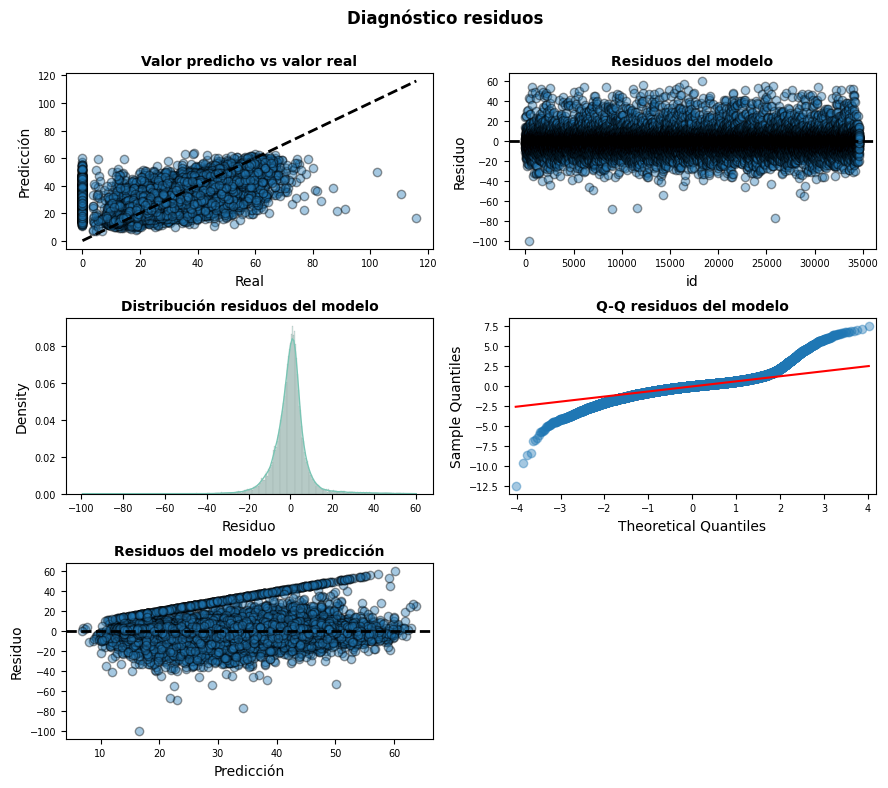

In [ ]:
#Analisis del conjunto de entrenamiento
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "#79C5B4",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Se tiene un cálculo en los VIF que se considera alto y el comportamiento de los residuos aun muestra que los datos siguen una tendencia, por lo que esto indicq que tiene que realizar tratamientos extra a los datos.


### <font color="#3D2FB2 " FACE="futura" size = 5 > **Modelos de machine learning**</font>

---

A continuación seleccionaremos las columnas de entrada y la columna objetivo, para ingresar a los modelos de machine learning.


In [ ]:
## Fare = ff28
## Kilometers = k28
## seconds =s28
## extras= e28
##tips = ti28
#Fmil= Fmil28
#Fsec= Fsec28
#Ptips= Pt28
# Ptolls= PTo28
#Pfare = Pf28
# Pextras = Pex28
# X= f[var]

Selección de variables para el modelo

In [ ]:
tt28 = tt28[['target']]

In [ ]:
data_model2_w28 = pd.concat([ff28, k28, s28, e28, ti28, Fmil28, Fsec28, Pt28, PTo28, Pf28, Pex28, tt28], axis= 1)

In [ ]:
data_model2_w28

,fare_mean_6,km_mean_6,sec_mean_6,extras_mean_6,tips_mean_6,FareMiles_mean_6,fareSec_mean_6,Ptips_mean_6,Ptolls_mean_6,Pfare_mean_6,Pextras_mean_6,target
0,25.201380,14.949314,1047.350496,3.215568,4.236448,20.900408,5.818614,0.119961,0.000000,0.785203,0.083907,34.330588
1,27.700563,16.802195,1247.926289,3.756044,5.199402,23.490893,6.932924,0.136422,0.000000,0.778464,0.077403,34.173585
2,12.650425,5.498669,749.866488,0.520202,2.144031,7.687605,4.165925,0.138211,0.000000,0.821045,0.028027,15.723417
3,27.830808,16.614947,1409.723329,5.183646,4.429126,23.229104,7.831796,0.102314,0.000000,0.780854,0.105503,33.053750
4,19.294027,10.442691,944.580546,2.031670,2.965758,14.599767,5.247670,0.113518,0.000000,0.825662,0.051388,21.060256
...,...,...,...,...,...,...,...,...,...,...,...,...
43270,30.009354,17.209671,1895.702003,4.030623,3.290370,24.060579,10.531678,0.095002,0.000000,0.815895,0.078979,39.810000
43271,15.869308,7.712903,1050.627174,1.329621,2.961297,10.783292,5.836818,0.138439,0.000000,0.800442,0.041320,8.668333
43272,18.099126,9.189543,1071.519225,1.279914,2.868593,12.847760,5.952885,0.120122,0.000000,0.823438,0.037391,33.716667
43273,23.773196,13.536862,1294.561463,2.820366,4.448464,18.925680,7.192008,0.119845,0.016462,0.774085,0.076864,33.661250


In [ ]:
data_model2_w28.columns

Index(['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6', 'FareMiles_mean_6', 'fareSec_mean_6', 'Ptips_mean_6',
       'Ptolls_mean_6', 'Pfare_mean_6', 'Pextras_mean_6', 'target'],
      dtype='object')

Seleccionando columnas y quitando datos que proporcionan redundancia en nuestros datos.


In [ ]:
X= data_model2_w28[['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6']]
y= data_model2_w28[['target']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **MLPClassifier**

---

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
#############################
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [ ]:
scx = MinMaxScaler()
scy = MinMaxScaler()
ann = MLPRegressor(activation='relu',hidden_layer_sizes=(20,))

In [ ]:
X= data_model2_w28[['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
scx.fit(X)
scy.fit(y)

MinMaxScaler()

In [ ]:
Xs = pd.DataFrame(scx.transform(X),columns=X.columns)
ys = scy.transform(y)

In [ ]:
Xt,Xv,yt,yv = train_test_split(Xs,ys,train_size=0.7, random_state=42)

In [ ]:
for p in [Xt,Xv,yt,yv]:
    print(p.shape)

(30292, 5)
(12983, 5)
(30292, 1)
(12983, 1)


In [ ]:
%%time
ann.fit(Xt,yt)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 900 ms, sys: 3.9 ms, total: 904 ms
Wall time: 917 ms


MLPRegressor(hidden_layer_sizes=(20,))

La clase MLPRegressor implementa un perceptrón múlticapa (MLP) que se entrena mediante retropropagación (backpropagation) sin función de activación en la capa de salida, lo que también puede ser visto como el uso de la función de identidad como función de activación. Por lo tanto, utiliza el error cuadrado como función de pérdida, y la salida es un conjunto de valores continuos.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
print (mean_squared_error(y_pred=ann.predict(Xt),y_true=yt))
print (mean_squared_error(y_pred=ann.predict(Xv),y_true=yv))

0.004700338707607963
0.00489083857626724


In [ ]:
print (r2_score(y_pred=ann.predict(Xt),y_true=yt))
print (r2_score(y_pred=ann.predict(Xv),y_true=yv))

0.6257354273277815
0.6146859713813343


In [ ]:
test = pd.DataFrame({'y^':ann.predict(Xv)})

In [ ]:
test ['y'] = yv

In [ ]:
import seaborn as sns

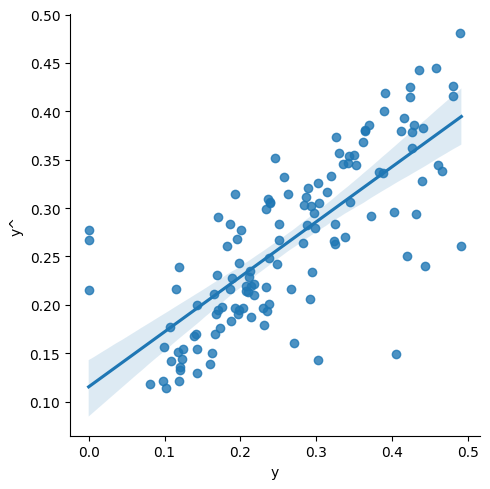

In [ ]:
sns.lmplot(data=test.sample(frac=0.01),x='y',y='y^',fit_reg=True)

In [ ]:
test

,y^,y
0,0.280425,0.197005
1,0.185625,0.250256
2,0.216815,0.252951
3,0.184994,0.183492
4,0.390831,0.403387
...,...,...
12978,0.255849,0.511298
12979,0.280249,0.282984
12980,0.152051,0.165768
12981,0.163306,0.228978


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Linear regression model**

---

In [ ]:
X= data_model2_w28[['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
X.shape, y.shape

((43275, 5), (43275, 1))

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30292, 5), (12983, 5), (30292, 1), (12983, 1))

In [ ]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred_test)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')

RMSE test: 8.117130993815781
RMSE train: 7.965997756929089
R2 Score test: 0.6139041838291066
R2 Score train 0.6241726181141444


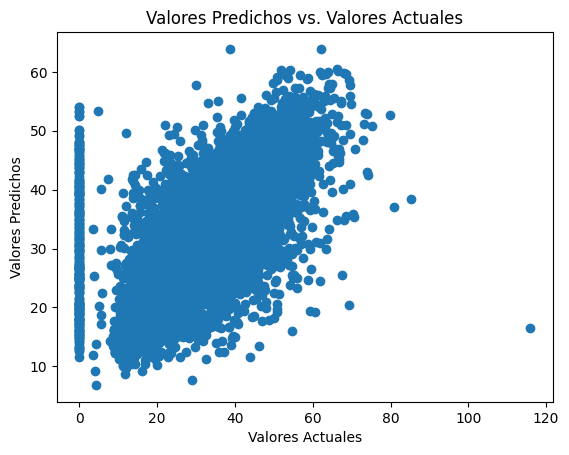

In [ ]:
# Graficar valores predichos vs. valores actuales
plt.scatter(y_test, y_pred_test)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales')
plt.show()

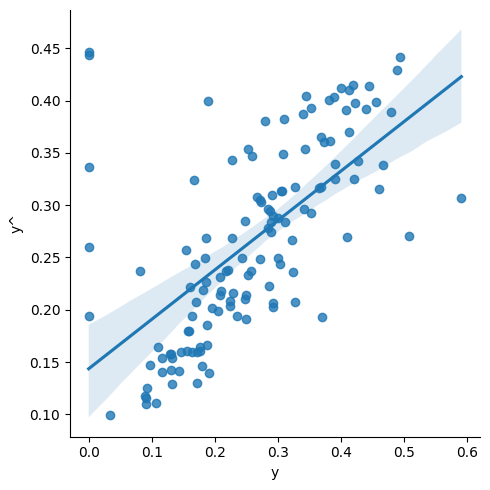

In [ ]:
sns.lmplot(data=test.sample(frac=0.01),x='y',y='y^',fit_reg=True)

In [ ]:
y_test

,target
11839,22.842778
20832,29.017222
1681,29.329670
12103,21.275932
16981,46.772692
...,...
3379,59.285000
11696,32.811957
33486,19.220750
14084,26.550000


In [ ]:
y_pred_test.shape

(12983, 1)

In [ ]:
len(y_pred_test)

12983

In [ ]:
comparaciones = pd.DataFrame(y_test).reset_index(drop=True)
comparaciones = comparaciones.assign(predictions = y_pred_test.flatten().tolist())
comparaciones.columns=['Total', 'Total_predicho']
comparaciones

,Total,Total_predicho
0,22.842778,32.512832
1,29.017222,21.719850
2,29.329670,25.312550
3,21.275932,21.613880
4,46.772692,45.521305
...,...,...
12978,59.285000,29.945593
12979,32.811957,32.499138
12980,19.220750,17.910512
12981,26.550000,19.137569


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Random Forest**

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X= data_model2_w28[['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
X.shape, y.shape

((43275, 5), (43275, 1))

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
%%time
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo RandomForestRegressor
rf_model = RandomForestRegressor(
            n_estimators = 100,                   #número de árboles incluidos en el modelo.
            criterion    = 'squared_error',       #métrica para dividir
            max_depth    = None,                  #profundidad máxima que pueden alcanzar los árboles.
            max_features = 'auto',                #número de predictores considerados a en cada división
            oob_score    = False,                 #Si se calcula o no el out-of-bag. Si es True aumenta el tiempo de entrenamiento
            n_jobs       = -1,                    #número de cores empleados para el entrenamiento, con -1 se usan todos los disponibles
            random_state = 1                      #semilla para que los resultados sean reproducibles.
         )


rf_model.fit(X_train, y_train)

<timed exec>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: user 37.2 s, sys: 441 ms, total: 37.6 s
Wall time: 27.3 s


RandomForestRegressor(max_features='auto', n_jobs=-1, random_state=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')

RMSE test: 8.336065345353553
RMSE train: 3.0319172150079385
R2 Score test: 0.5978345546673258
R2 Score train 0.9454542477688919


In [ ]:
y_test.shape, y_pred.shape

((8655, 1), (8655,))

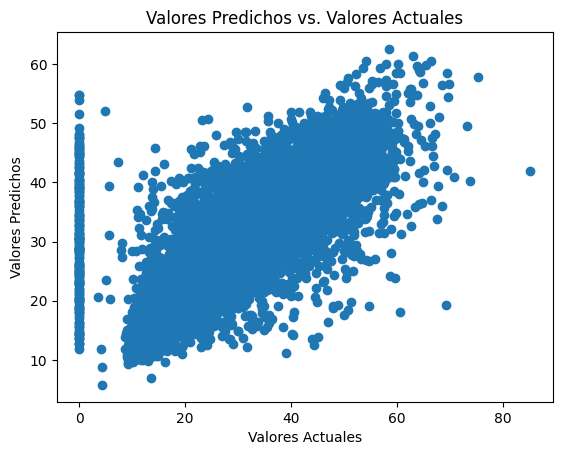

In [ ]:
# Graficar valores predichos vs. valores actuales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales')
plt.show()

In [ ]:
comparaciones = pd.DataFrame(y_test).reset_index(drop=True)
comparaciones = comparaciones.assign(predictions = y_pred.flatten().tolist())
comparaciones.columns=['Total', 'Total_predicho']
comparaciones

,Total,Total_predicho
0,22.842778,34.057373
1,29.017222,19.945797
2,29.329670,22.073086
3,21.275932,20.705944
4,46.772692,46.129924
...,...,...
8650,41.380000,20.727591
8651,36.272000,32.994357
8652,10.838085,11.024313
8653,36.854878,29.667010


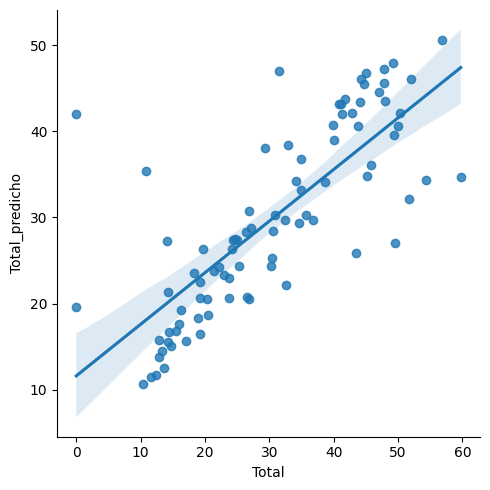

In [ ]:
sns.lmplot(data=comparaciones.sample(frac=0.01),x='Total',y='Total_predicho',fit_reg=True)


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **XGBoots**

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X= data_model2_w28[['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
%%time
# Crear y entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

CPU times: user 2.26 s, sys: 7.9 ms, total: 2.27 s
Wall time: 3.86 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')

RMSE test: 8.38969852877043
RMSE train: 3.0319172150079385
R2 Score test: 0.5926429445668218
R2 Score train 0.9454542477688919


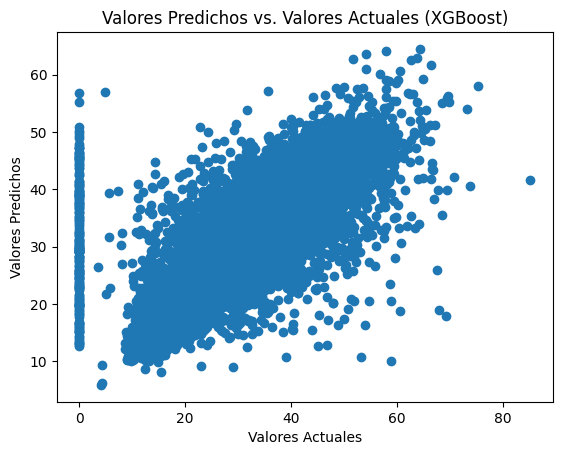

In [ ]:
# Graficar valores predichos vs. valores actuales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales (XGBoost)')
plt.show()

In [ ]:
comparaciones = pd.DataFrame(y_test).reset_index(drop=True)
comparaciones = comparaciones.assign(predictions = y_pred.flatten().tolist())
comparaciones.columns=['Total', 'Total_predicho']
comparaciones

,Total,Total_predicho
0,22.842778,33.011501
1,29.017222,21.396927
2,29.329670,23.765118
3,21.275932,20.054176
4,46.772692,44.952309
...,...,...
8650,41.380000,21.935665
8651,36.272000,33.327381
8652,10.838085,11.687016
8653,36.854878,30.902142


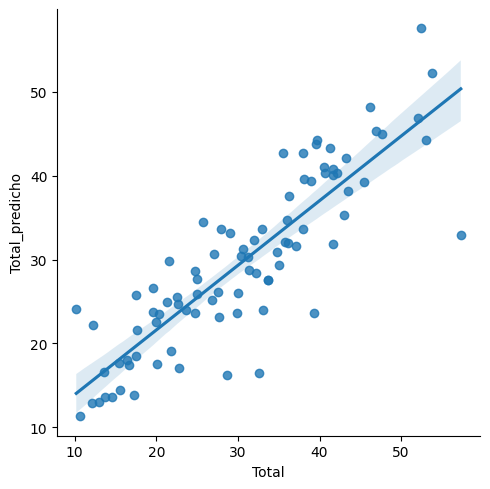

In [ ]:
sns.lmplot(data=comparaciones.sample(frac=0.01),x='Total',y='Total_predicho',fit_reg=True)

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Red Neuronal**

---

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ### para llamar a las capas densas
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X= data_model2_w28[['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Definición del modelo
model = Sequential()  ##
## Probar capitas, multiplos de 8, 16, 32,"64 y 128"
# Primera debe tener por lo menos una neurona por cada variable,
##Va decreciendo o aumentando de forma gradual dependiendo de la capa de salida
## verificar valores jerarquicos para establecer capas
model.add(Dense(64, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1)) ### regresión una neurona de salida

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
# Definir EarlyStopping
## Solo espero 5 iteraciones cuando sigue calculando la misma función de perdida y deja de mejorar, asi evitamso el sobre ajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
%%time

#batch_size=32, probar quitarlo y poner en model.fit
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks = [early_stopping])
# model.fit(x=Xs_train, y=y_train, epochs=600, validation_data=(Xs_val, y_val), verbose=1, callbacks=[early_stop])

Epoch 1/100
1082/1082 [==============================] - 4s 2ms/step - loss: 326.4221 - val_loss: 76.5002
Epoch 2/100
1082/1082 [==============================] - 2s 2ms/step - loss: 69.3792 - val_loss: 72.8690
Epoch 3/100
1082/1082 [==============================] - 5s 4ms/step - loss: 67.1235 - val_loss: 70.7154
Epoch 4/100
1082/1082 [==============================] - 7s 7ms/step - loss: 65.9193 - val_loss: 69.4822
Epoch 5/100
1082/1082 [==============================] - 3s 3ms/step - loss: 65.0803 - val_loss: 69.0533
Epoch 6/100
1082/1082 [==============================] - 2s 2ms/step - loss: 64.5780 - val_loss: 68.0324
Epoch 7/100
1082/1082 [==============================] - 2s 2ms/step - loss: 64.2211 - val_loss: 67.7924
Epoch 8/100
1082/1082 [==============================] - 3s 3ms/step - loss: 64.0051 - val_loss: 67.4295
Epoch 9/100
1082/1082 [==============================] - 3s 3ms/step - loss: 63.8804 - val_loss: 67.2047
Epoch 10/100
1082/1082 [==============================

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

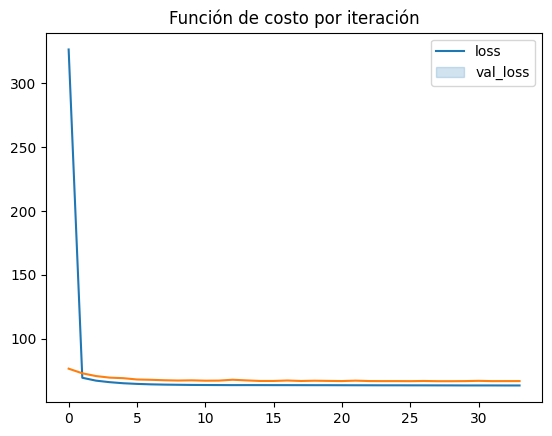

In [ ]:

sns.lineplot(x=range(len(loss)), y=loss)
sns.lineplot(x=range(len(loss)), y=val_loss)
plt.legend(['loss', 'val_loss'])
plt.title("Función de costo por iteración");

In [ ]:
### Despues puedo saltar a calcular las predicciones de los valores de Xs_train y Xs_test

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

271/271 [==============================] - 0s 1ms/step


In [ ]:
training_score = model.evaluate(X_train, y_train, verbose=0)
validation_score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
training_score

63.311302185058594

In [ ]:
validation_score

66.69773864746094

#### Prueba de tabla con valores de los modelos

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Red Neuronal**

---

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ### para llamar a las capas densas
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X= data_model2_w28[['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Definición del modelo
model = Sequential()  ##
## Probar capitas, multiplos de 8, 16, 32,"64 y 128"
# Primera debe tener por lo menos una neurona por cada variable,
##Va decreciendo o aumentando de forma gradual dependiendo de la capa de salida
## verificar valores jerarquicos para establecer capas
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) ### regresión una neurona de salida

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
# Definir EarlyStopping
## Solo espero 5 iteraciones cuando sigue calculando la misma función de perdida y deja de mejorar, asi evitamso el sobre ajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
%%time

#batch_size=32, probar quitarlo y poner en model.fit
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks = [early_stopping])
# model.fit(x=Xs_train, y=y_train, epochs=600, validation_data=(Xs_val, y_val), verbose=1, callbacks=[early_stop])

Epoch 1/100
1082/1082 [==============================] - 4s 3ms/step - loss: 320.4299 - val_loss: 74.4709
Epoch 2/100
1082/1082 [==============================] - 3s 2ms/step - loss: 67.7392 - val_loss: 70.5260
Epoch 3/100
1082/1082 [==============================] - 2s 2ms/step - loss: 65.6340 - val_loss: 68.8727
Epoch 4/100
1082/1082 [==============================] - 3s 2ms/step - loss: 64.6057 - val_loss: 67.8329
Epoch 5/100
1082/1082 [==============================] - 3s 2ms/step - loss: 64.1208 - val_loss: 67.3778
Epoch 6/100
1082/1082 [==============================] - 3s 3ms/step - loss: 63.9138 - val_loss: 67.1079
Epoch 7/100
1082/1082 [==============================] - 3s 3ms/step - loss: 63.8109 - val_loss: 67.0329
Epoch 8/100
1082/1082 [==============================] - 2s 2ms/step - loss: 63.7544 - val_loss: 67.3656
Epoch 9/100
1082/1082 [==============================] - 2s 2ms/step - loss: 63.7631 - val_loss: 66.9176
Epoch 10/100
1082/1082 [==============================

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

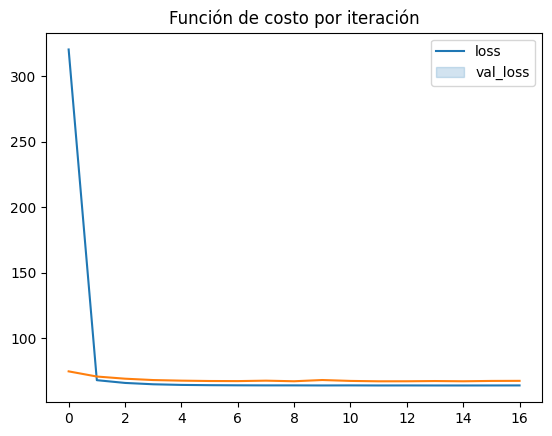

In [ ]:

sns.lineplot(x=range(len(loss)), y=loss)
sns.lineplot(x=range(len(loss)), y=val_loss)
plt.legend(['loss', 'val_loss'])
plt.title("Función de costo por iteración");

In [ ]:
### Despues puedo saltar a calcular las predicciones de los valores de Xs_train y Xs_test

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

271/271 [==============================] - 0s 1ms/step


In [ ]:
training_score = model.evaluate(X_train, y_train, verbose=0)
validation_score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
training_score

63.52842330932617

In [ ]:
validation_score

66.87992858886719

## <font color="#3D2FB2 " FACE="futura" size = 5 > **Análisis de variables 2**

Se realizar un análisis de variables que se ingresan al modelo. Para la selección de variables se toma en cuenta el cálculo del VIF (variance_inflation_factor).   
Las variables seleccionadas son: 'fare_mean_6','extras_mean_6', Ptips_mean_6', 'Ptolls_mean_6'

In [ ]:
data_model2_w28 = pd.concat([ff28, k28, s28, e28, ti28, Fmil28, Fsec28, Pt28, PTo28, Pf28, Pex28, tt28], axis= 1)

In [ ]:
data_model2_w28.columns

Index(['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6', 'FareMiles_mean_6', 'fareSec_mean_6', 'Ptips_mean_6',
       'Ptolls_mean_6', 'Pfare_mean_6', 'Pextras_mean_6', 'target'],
      dtype='object')

In [ ]:
X= data_model2_w28[[ 'fare_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
Xcorr_28WT1 = X.corr()
Xcorr_28WT1.style.background_gradient(cmap= 'YlOrBr')

,fare_mean_6,extras_mean_6,Ptips_mean_6,Ptolls_mean_6
fare_mean_6,1.000000,0.682291,0.005267,0.091622
extras_mean_6,0.682291,1.000000,0.352990,0.065731
Ptips_mean_6,0.005267,0.352990,1.000000,0.051178
Ptolls_mean_6,0.091622,0.065731,0.051178,1.000000


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.reshape(-1,1),
                                                    train_size   = 0.7,
                                                    random_state = 42)

#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
import statsmodels.api as sm
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
# X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          1.182e+05
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                        0.00
Time:                        10:54:34   Log-Likelihood:                     -1.0632e+05
No. Observations:               30292   AIC:                                  2.126e+05
Df Residuals:                   30288   BIC:                                  2.127e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## Creo una Dataframe para lso datos del VIF
vif_data = pd.DataFrame()

# Asigno el nombre de las columnas al nuevo DataFrame
vif_data['Features']= X.columns

## Importando librería para el cálculo del VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Calculando el VIF para cada característica
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns)) ]
vif_data

,Features,VIF
0,fare_mean_6,6.851988
1,extras_mean_6,3.953275
2,Ptips_mean_6,4.691093
3,Ptolls_mean_6,1.023133


In [ ]:
#Entrenamiento
y_train = y_train.flatten()

#Predicciones
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

<ipython-input-222-86fb7c9ae070>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


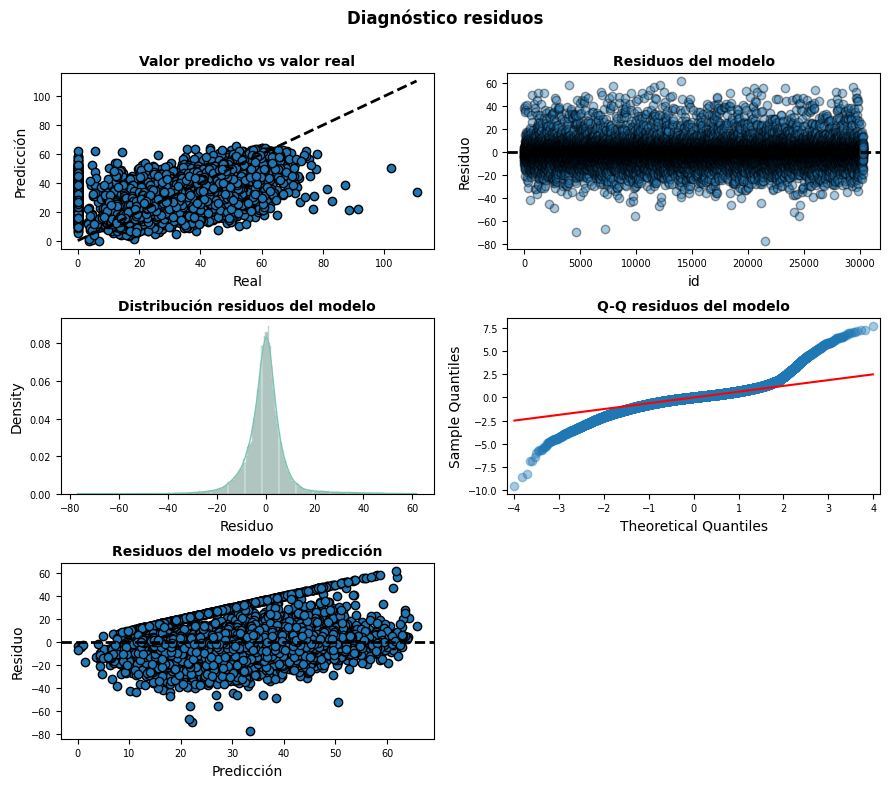

In [ ]:
#Analisis del conjunto de entrenamiento
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

# axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0))
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "#79C5B4",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

# axes[2, 0].scatter(prediccion_train, residuos_train,
#                    edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0))
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


### <font color="#3D2FB2 " FACE="futura" size = 5 > **Modelos de machine learning**</font>

---

A continuación seleccionaremos las columnas de entrada y la columna objetivo, para ingresar a los modelos de machine learning.


In [ ]:
## Fare = ff28
## Kilometers = k28
## seconds =s28
## extras= e28
##tips = ti28
#Fmil= Fmil28
#Fsec= Fsec28
#Ptips= Pt28
# Ptolls= PTo28
#Pfare = Pf28
# Pextras = Pex28
# X= f[var]

Selección de variables para el modelo

In [ ]:
tt28 = tt28[['target']]

In [ ]:
data_model2_w28 = pd.concat([ff28, k28, s28, e28, ti28, Fmil28, Fsec28, Pt28, PTo28, Pf28, Pex28, tt28], axis= 1)

In [ ]:
data_model2_w28

,fare_mean_6,km_mean_6,sec_mean_6,extras_mean_6,tips_mean_6,FareMiles_mean_6,fareSec_mean_6,Ptips_mean_6,Ptolls_mean_6,Pfare_mean_6,Pextras_mean_6,target
0,25.201380,14.949314,1047.350496,3.215568,4.236448,20.900408,5.818614,0.119961,0.000000,0.785203,0.083907,34.330588
1,27.700563,16.802195,1247.926289,3.756044,5.199402,23.490893,6.932924,0.136422,0.000000,0.778464,0.077403,34.173585
2,12.650425,5.498669,749.866488,0.520202,2.144031,7.687605,4.165925,0.138211,0.000000,0.821045,0.028027,15.723417
3,27.830808,16.614947,1409.723329,5.183646,4.429126,23.229104,7.831796,0.102314,0.000000,0.780854,0.105503,33.053750
4,19.294027,10.442691,944.580546,2.031670,2.965758,14.599767,5.247670,0.113518,0.000000,0.825662,0.051388,21.060256
...,...,...,...,...,...,...,...,...,...,...,...,...
43270,30.009354,17.209671,1895.702003,4.030623,3.290370,24.060579,10.531678,0.095002,0.000000,0.815895,0.078979,39.810000
43271,15.869308,7.712903,1050.627174,1.329621,2.961297,10.783292,5.836818,0.138439,0.000000,0.800442,0.041320,8.668333
43272,18.099126,9.189543,1071.519225,1.279914,2.868593,12.847760,5.952885,0.120122,0.000000,0.823438,0.037391,33.716667
43273,23.773196,13.536862,1294.561463,2.820366,4.448464,18.925680,7.192008,0.119845,0.016462,0.774085,0.076864,33.661250


In [ ]:
data_model2_w28.columns

Index(['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6', 'FareMiles_mean_6', 'fareSec_mean_6', 'Ptips_mean_6',
       'Ptolls_mean_6', 'Pfare_mean_6', 'Pextras_mean_6', 'target'],
      dtype='object')

Seleccionando columnas y quitando datos que proporcionan redundancia en nuestros datos.


In [ ]:
X= data_model2_w28[[ 'fare_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **MLPClassifier**

---

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
#############################
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [ ]:
scx = MinMaxScaler()
scy = MinMaxScaler()
ann = MLPRegressor(activation='relu',hidden_layer_sizes=(20,))

In [ ]:
X= data_model2_w28[[ 'fare_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
scx.fit(X)
scy.fit(y)

MinMaxScaler()

In [ ]:
Xs = pd.DataFrame(scx.transform(X),columns=X.columns)
ys = scy.transform(y)

In [ ]:
Xt,Xv,yt,yv = train_test_split(Xs,ys,train_size=0.7, random_state=42)

In [ ]:
for p in [Xt,Xv,yt,yv]:
    print(p.shape)

(30292, 4)
(12983, 4)
(30292, 1)
(12983, 1)


In [ ]:
%%time
ann.fit(Xt,yt)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 702 ms, sys: 4.72 ms, total: 707 ms
Wall time: 718 ms


MLPRegressor(hidden_layer_sizes=(20,))

La clase MLPRegressor implementa un perceptrón múlticapa (MLP) que se entrena mediante retropropagación (backpropagation) sin función de activación en la capa de salida, lo que también puede ser visto como el uso de la función de identidad como función de activación. Por lo tanto, utiliza el error cuadrado como función de pérdida, y la salida es un conjunto de valores continuos.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
print (mean_squared_error(y_pred=ann.predict(Xt),y_true=yt))
print (mean_squared_error(y_pred=ann.predict(Xv),y_true=yv))

0.004776244925118217
0.0049544692791461745


In [ ]:
print (r2_score(y_pred=ann.predict(Xt),y_true=yt))
print (r2_score(y_pred=ann.predict(Xv),y_true=yv))

0.6196913930938961
0.6096729655158184


In [ ]:
test = pd.DataFrame({'y^':ann.predict(Xv)})

In [ ]:
test ['y'] = yv

In [ ]:
import seaborn as sns

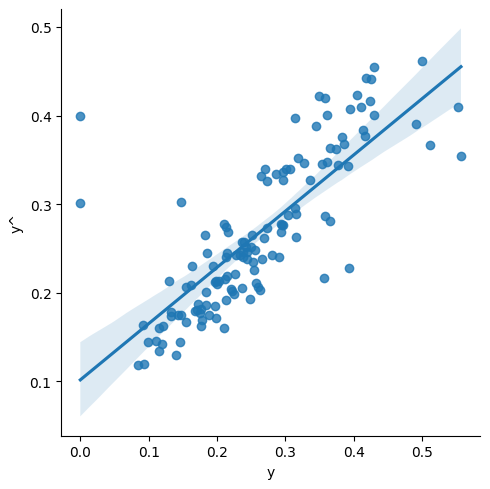

In [ ]:
sns.lmplot(data=test.sample(frac=0.01),x='y',y='y^',fit_reg=True)

In [ ]:
test

,y^,y
0,0.281563,0.197005
1,0.186446,0.250256
2,0.225059,0.252951
3,0.184242,0.183492
4,0.385782,0.403387
...,...,...
12978,0.258545,0.511298
12979,0.275738,0.282984
12980,0.155968,0.165768
12981,0.172682,0.228978


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Linear regression model**

---

In [ ]:
X= data_model2_w28[[ 'fare_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
X.shape, y.shape

((43275, 4), (43275, 1))

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30292, 4), (12983, 4), (30292, 1), (12983, 1))

In [ ]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred_test)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')

RMSE test: 8.164475847355604
RMSE train: 8.016307372097579
R2 Score test: 0.6093870804802961
R2 Score train 0.6194105185400476


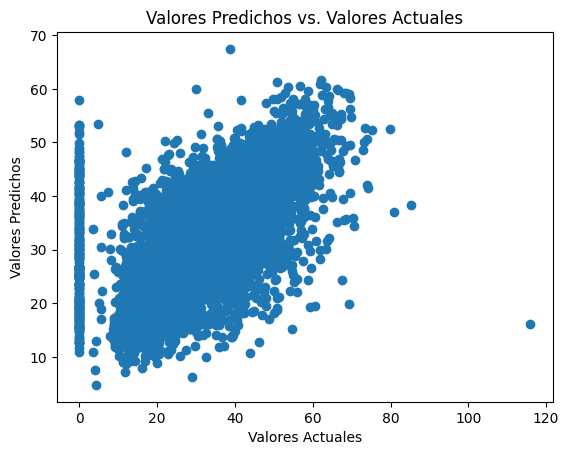

In [ ]:
# Graficar valores predichos vs. valores actuales
plt.scatter(y_test, y_pred_test)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales')
plt.show()

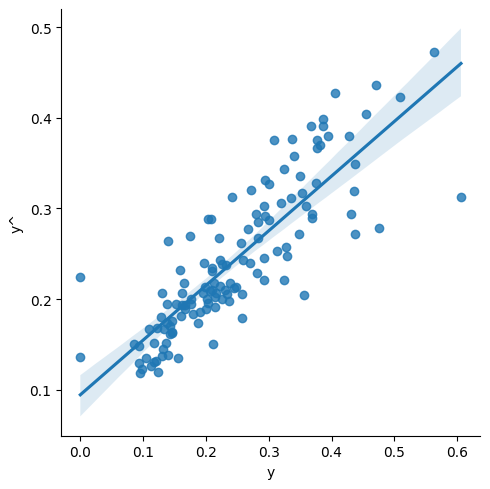

In [ ]:
sns.lmplot(data=test.sample(frac=0.01),x='y',y='y^',fit_reg=True)

In [ ]:
y_test

,target
11839,22.842778
20832,29.017222
1681,29.329670
12103,21.275932
16981,46.772692
...,...
3379,59.285000
11696,32.811957
33486,19.220750
14084,26.550000


In [ ]:
y_pred_test.shape

(12983, 1)

In [ ]:
len(y_pred_test)

12983

In [ ]:
comparaciones = pd.DataFrame(y_test).reset_index(drop=True)
comparaciones = comparaciones.assign(predictions = y_pred_test.flatten().tolist())
comparaciones.columns=['Total', 'Total_predicho']
comparaciones

,Total,Total_predicho
0,22.842778,32.286710
1,29.017222,21.247789
2,29.329670,25.224885
3,21.275932,21.302209
4,46.772692,44.312716
...,...,...
12978,59.285000,29.729981
12979,32.811957,31.639617
12980,19.220750,17.927618
12981,26.550000,18.733828


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Random Forest**

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X= data_model2_w28[[ 'fare_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
X.shape, y.shape

((43275, 4), (43275, 1))

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
%%time
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo RandomForestRegressor
rf_model = RandomForestRegressor(
            n_estimators = 100,                   #número de árboles incluidos en el modelo.
            criterion    = 'squared_error',       #métrica para dividir
            max_depth    = None,                  #profundidad máxima que pueden alcanzar los árboles.
            max_features = 'auto',                #número de predictores considerados a en cada división
            oob_score    = False,                 #Si se calcula o no el out-of-bag. Si es True aumenta el tiempo de entrenamiento
            n_jobs       = -1,                    #número de cores empleados para el entrenamiento, con -1 se usan todos los disponibles
            random_state = 1                      #semilla para que los resultados sean reproducibles.
         )


rf_model.fit(X_train, y_train)

<timed exec>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: user 24.5 s, sys: 549 ms, total: 25.1 s
Wall time: 17.2 s


RandomForestRegressor(max_features='auto', n_jobs=-1, random_state=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')

RMSE test: 8.452890586448916
RMSE train: 3.11026683455162
R2 Score test: 0.5864833250971162
R2 Score train 0.9425987227123135


In [ ]:
y_test.shape, y_pred.shape

((8655, 1), (8655,))

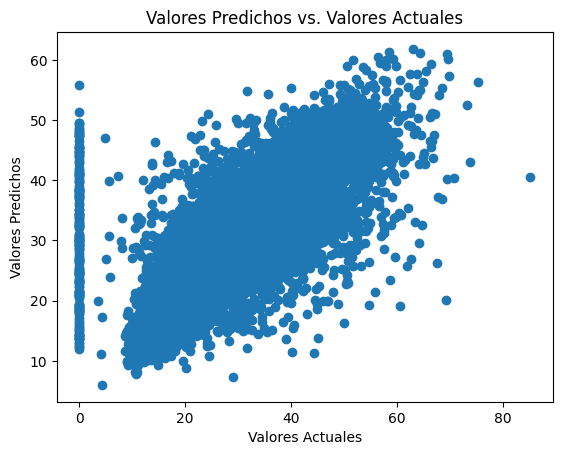

In [ ]:
# Graficar valores predichos vs. valores actuales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales')
plt.show()

In [ ]:
comparaciones = pd.DataFrame(y_test).reset_index(drop=True)
comparaciones = comparaciones.assign(predictions = y_pred.flatten().tolist())
comparaciones.columns=['Total', 'Total_predicho']
comparaciones

,Total,Total_predicho
0,22.842778,35.399769
1,29.017222,20.557718
2,29.329670,18.791306
3,21.275932,21.619890
4,46.772692,43.158794
...,...,...
8650,41.380000,22.084663
8651,36.272000,36.089772
8652,10.838085,12.056782
8653,36.854878,30.001395


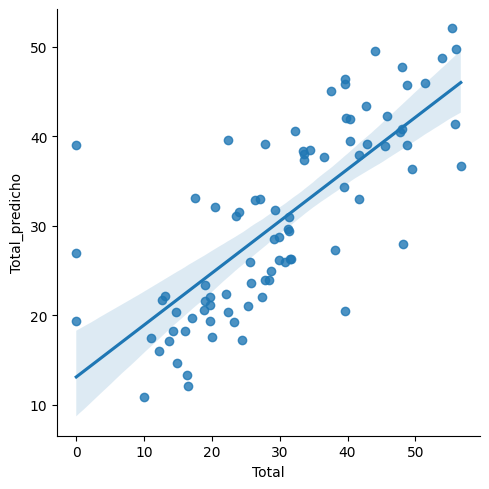

In [ ]:
sns.lmplot(data=comparaciones.sample(frac=0.01),x='Total',y='Total_predicho',fit_reg=True)


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **XGBoots**

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X= data_model2_w28[[ 'fare_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
%%time
# Crear y entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

CPU times: user 1.69 s, sys: 12.4 ms, total: 1.7 s
Wall time: 1.94 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')

RMSE test: 8.323922454248214
RMSE train: 3.11026683455162
R2 Score test: 0.5990053454948745
R2 Score train 0.9425987227123135


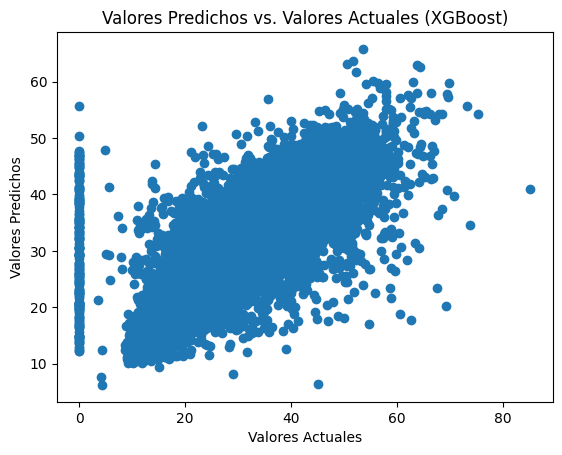

In [ ]:
# Graficar valores predichos vs. valores actuales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales (XGBoost)')
plt.show()

In [ ]:
comparaciones = pd.DataFrame(y_test).reset_index(drop=True)
comparaciones = comparaciones.assign(predictions = y_pred.flatten().tolist())
comparaciones.columns=['Total', 'Total_predicho']
comparaciones

,Total,Total_predicho
0,22.842778,33.719322
1,29.017222,23.664793
2,29.329670,23.423094
3,21.275932,20.351219
4,46.772692,41.714005
...,...,...
8650,41.380000,17.476402
8651,36.272000,33.536457
8652,10.838085,12.190718
8653,36.854878,31.049070


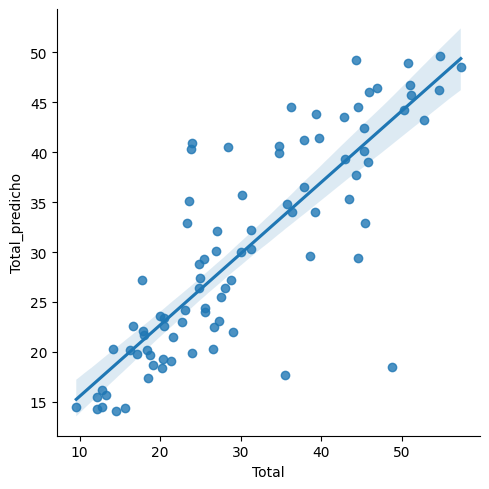

In [ ]:
sns.lmplot(data=comparaciones.sample(frac=0.01),x='Total',y='Total_predicho',fit_reg=True)

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Red Neuronal**

---

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ### para llamar a las capas densas
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X= data_model2_w28[[ 'fare_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Definición del modelo
model = Sequential()  ##
## Probar capitas, multiplos de 8, 16, 32,"64 y 128"
# Primera debe tener por lo menos una neurona por cada variable,
##Va decreciendo o aumentando de forma gradual dependiendo de la capa de salida
## verificar valores jerarquicos para establecer capas
model.add(Dense(64, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1)) ### regresión una neurona de salida

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
# Definir EarlyStopping
## Solo espero 5 iteraciones cuando sigue calculando la misma función de perdida y deja de mejorar, asi evitamso el sobre ajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
%%time

#batch_size=32, probar quitarlo y poner en model.fit
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks = [early_stopping])
# model.fit(x=Xs_train, y=y_train, epochs=600, validation_data=(Xs_val, y_val), verbose=1, callbacks=[early_stop])

Epoch 1/100
1082/1082 [==============================] - 5s 4ms/step - loss: 401.5553 - val_loss: 94.1040
Epoch 2/100
1082/1082 [==============================] - 3s 3ms/step - loss: 73.8564 - val_loss: 68.9213
Epoch 3/100
1082/1082 [==============================] - 3s 2ms/step - loss: 64.9050 - val_loss: 67.7435
Epoch 4/100
1082/1082 [==============================] - 2s 2ms/step - loss: 64.4307 - val_loss: 67.7630
Epoch 5/100
1082/1082 [==============================] - 2s 2ms/step - loss: 64.2260 - val_loss: 67.4644
Epoch 6/100
1082/1082 [==============================] - 2s 2ms/step - loss: 64.1224 - val_loss: 67.6833
Epoch 7/100
1082/1082 [==============================] - 3s 2ms/step - loss: 64.0537 - val_loss: 67.3856
Epoch 8/100
1082/1082 [==============================] - 3s 3ms/step - loss: 64.0208 - val_loss: 67.3699
Epoch 9/100
1082/1082 [==============================] - 2s 2ms/step - loss: 64.0051 - val_loss: 68.1588
Epoch 10/100
1082/1082 [==============================

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

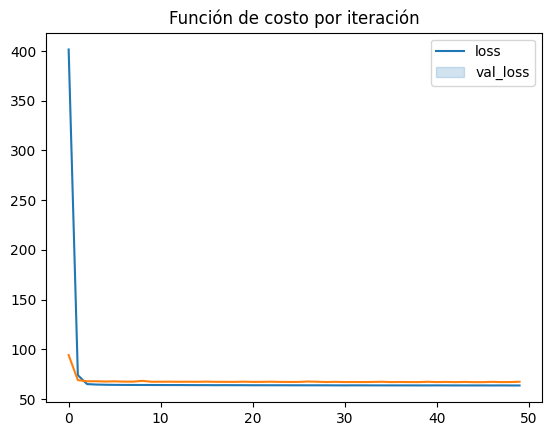

In [ ]:

sns.lineplot(x=range(len(loss)), y=loss)
sns.lineplot(x=range(len(loss)), y=val_loss)
plt.legend(['loss', 'val_loss'])
plt.title("Función de costo por iteración");

In [ ]:
### Despues puedo saltar a calcular las predicciones de los valores de Xs_train y Xs_test

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

271/271 [==============================] - 0s 1ms/step


In [ ]:
training_score = model.evaluate(X_train, y_train, verbose=0)
validation_score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
training_score

63.49982833862305

In [ ]:
validation_score

66.86886596679688

#### Prueba de tabla con valores de los modelos

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Red Neuronal**

---

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ### para llamar a las capas densas
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X= data_model2_w28[[ 'fare_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Definición del modelo
model = Sequential()  ##
## Probar capitas, multiplos de 8, 16, 32,"64 y 128"
# Primera debe tener por lo menos una neurona por cada variable,
##Va decreciendo o aumentando de forma gradual dependiendo de la capa de salida
## verificar valores jerarquicos para establecer capas
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) ### regresión una neurona de salida

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
# Definir EarlyStopping
## Solo espero 5 iteraciones cuando sigue calculando la misma función de perdida y deja de mejorar, asi evitamso el sobre ajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
%%time

#batch_size=32, probar quitarlo y poner en model.fit
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks = [early_stopping])
# model.fit(x=Xs_train, y=y_train, epochs=600, validation_data=(Xs_val, y_val), verbose=1, callbacks=[early_stop])

Epoch 1/100
1082/1082 [==============================] - 3s 3ms/step - loss: 271.8910 - val_loss: 71.6703
Epoch 2/100
1082/1082 [==============================] - 2s 2ms/step - loss: 65.3265 - val_loss: 68.0955
Epoch 3/100
1082/1082 [==============================] - 3s 3ms/step - loss: 64.5660 - val_loss: 67.5183
Epoch 4/100
1082/1082 [==============================] - 3s 3ms/step - loss: 64.4089 - val_loss: 68.3479
Epoch 5/100
1082/1082 [==============================] - 2s 2ms/step - loss: 64.2633 - val_loss: 67.3446
Epoch 6/100
1082/1082 [==============================] - 3s 2ms/step - loss: 64.1909 - val_loss: 68.0245
Epoch 7/100
1082/1082 [==============================] - 3s 3ms/step - loss: 64.1228 - val_loss: 67.3079
Epoch 8/100
1082/1082 [==============================] - 3s 3ms/step - loss: 64.0420 - val_loss: 67.5428
Epoch 9/100
1082/1082 [==============================] - 3s 3ms/step - loss: 63.9852 - val_loss: 67.2425
Epoch 10/100
1082/1082 [==============================

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

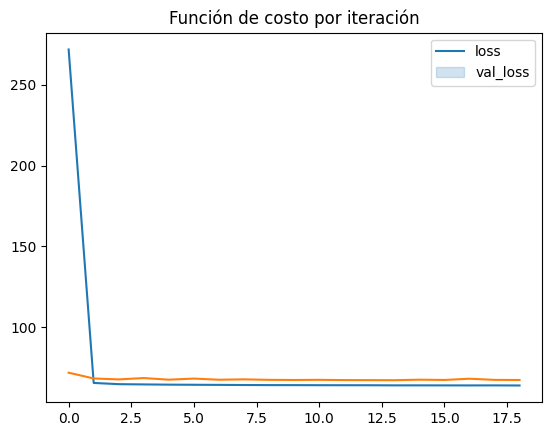

In [ ]:

sns.lineplot(x=range(len(loss)), y=loss)
sns.lineplot(x=range(len(loss)), y=val_loss)
plt.legend(['loss', 'val_loss'])
plt.title("Función de costo por iteración");

In [ ]:
### Despues puedo saltar a calcular las predicciones de los valores de Xs_train y Xs_test

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

271/271 [==============================] - 0s 1ms/step


In [ ]:
training_score = model.evaluate(X_train, y_train, verbose=0)
validation_score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
training_score

63.700164794921875

In [ ]:
validation_score

67.01614379882812

## <font color="#3D2FB2 " FACE="futura" size = 5 > **Análisis de variables 3**

Se realizar un análisis de variables que se ingresan al modelo. Para la selección de variables se toma en cuenta el cálculo del VIF (variance_inflation_factor).   
Las variables seleccionadas son: 'fare_mean_6','extras_mean_6', Ptips_mean_6', 'Ptolls_mean_6'

In [ ]:
data_model2_w28 = pd.concat([ff28, k28, s28, e28, ti28, Fmil28, Fsec28, Pt28, PTo28, Pf28, Pex28, tt28], axis= 1)

In [ ]:
data_model2_w28.columns

Index(['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6', 'FareMiles_mean_6', 'fareSec_mean_6', 'Ptips_mean_6',
       'Ptolls_mean_6', 'Pfare_mean_6', 'Pextras_mean_6', 'target'],
      dtype='object')

In [ ]:
X= data_model2_w28[[ 'FareMiles_mean_6', 'fareSec_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
Xcorr_28WT1 = X.corr()
Xcorr_28WT1.style.background_gradient(cmap= 'YlOrBr')

,FareMiles_mean_6,fareSec_mean_6,extras_mean_6,Ptips_mean_6,Ptolls_mean_6
FareMiles_mean_6,1.000000,0.698548,0.597793,0.092812,0.101520
fareSec_mean_6,0.698548,1.000000,0.592669,-0.023711,0.075371
extras_mean_6,0.597793,0.592669,1.000000,0.352990,0.065731
Ptips_mean_6,0.092812,-0.023711,0.352990,1.000000,0.051178
Ptolls_mean_6,0.101520,0.075371,0.065731,0.051178,1.000000


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.values.reshape(-1,1),
                                                    train_size   = 0.7,
                                                    random_state = 42)

#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
import statsmodels.api as sm
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
# X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          7.030e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:04:10   Log-Likelihood:                     -1.1049e+05
No. Observations:               30292   AIC:                                  2.210e+05
Df Residuals:                   30287   BIC:                                  2.210e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## Creo una Dataframe para lso datos del VIF
vif_data = pd.DataFrame()

# Asigno el nombre de las columnas al nuevo DataFrame
vif_data['Features']= X.columns

## Importando librería para el cálculo del VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Calculando el VIF para cada característica
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns)) ]
vif_data

,Features,VIF
0,FareMiles_mean_6,9.731794
1,fareSec_mean_6,12.008068
2,extras_mean_6,3.979643
3,Ptips_mean_6,4.844745
4,Ptolls_mean_6,1.026564


In [ ]:
#Entrenamiento
y_train = y_train.flatten()

#Predicciones
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

<ipython-input-321-4059ec6919e6>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


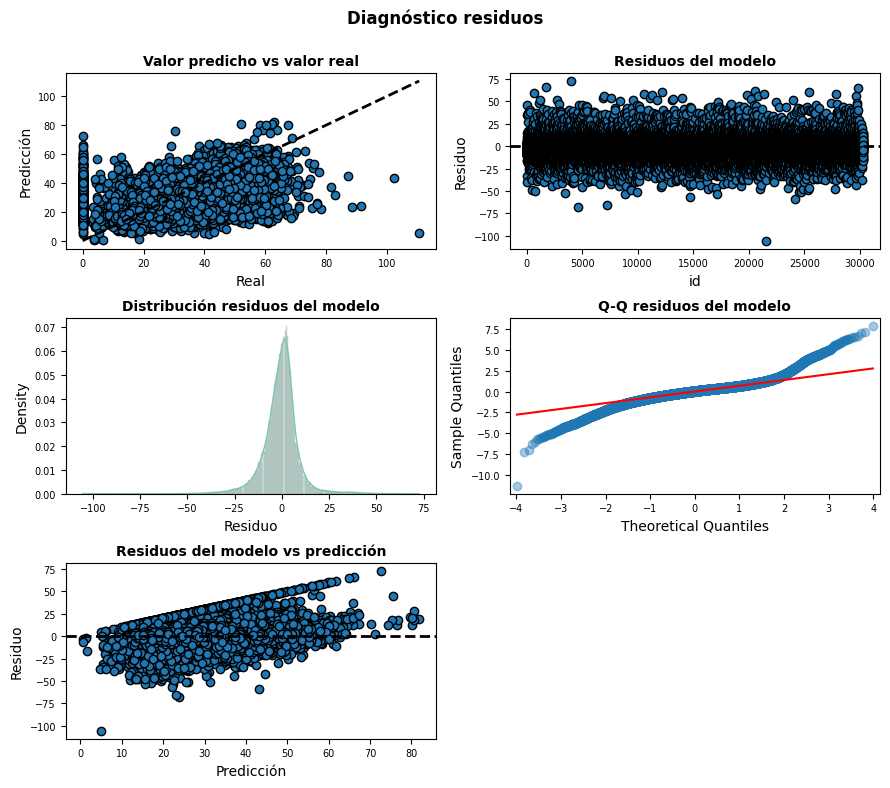

In [ ]:
#Analisis del conjunto de entrenamiento
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0))
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0),)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "#79C5B4",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0))
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


### <font color="#3D2FB2 " FACE="futura" size = 5 > **Modelos de machine learning**</font>

---

A continuación seleccionaremos las columnas de entrada y la columna objetivo, para ingresar a los modelos de machine learning.


In [ ]:
## Fare = ff28
## Kilometers = k28
## seconds =s28
## extras= e28
##tips = ti28
#Fmil= Fmil28
#Fsec= Fsec28
#Ptips= Pt28
# Ptolls= PTo28
#Pfare = Pf28
# Pextras = Pex28
# X= f[var]

Selección de variables para el modelo

In [ ]:
tt28 = tt28[['target']]

In [ ]:
data_model2_w28 = pd.concat([ff28, k28, s28, e28, ti28, Fmil28, Fsec28, Pt28, PTo28, Pf28, Pex28, tt28], axis= 1)

In [ ]:
data_model2_w28

,fare_mean_6,km_mean_6,sec_mean_6,extras_mean_6,tips_mean_6,FareMiles_mean_6,fareSec_mean_6,Ptips_mean_6,Ptolls_mean_6,Pfare_mean_6,Pextras_mean_6,target
0,25.201380,14.949314,1047.350496,3.215568,4.236448,20.900408,5.818614,0.119961,0.000000,0.785203,0.083907,34.330588
1,27.700563,16.802195,1247.926289,3.756044,5.199402,23.490893,6.932924,0.136422,0.000000,0.778464,0.077403,34.173585
2,12.650425,5.498669,749.866488,0.520202,2.144031,7.687605,4.165925,0.138211,0.000000,0.821045,0.028027,15.723417
3,27.830808,16.614947,1409.723329,5.183646,4.429126,23.229104,7.831796,0.102314,0.000000,0.780854,0.105503,33.053750
4,19.294027,10.442691,944.580546,2.031670,2.965758,14.599767,5.247670,0.113518,0.000000,0.825662,0.051388,21.060256
...,...,...,...,...,...,...,...,...,...,...,...,...
43270,30.009354,17.209671,1895.702003,4.030623,3.290370,24.060579,10.531678,0.095002,0.000000,0.815895,0.078979,39.810000
43271,15.869308,7.712903,1050.627174,1.329621,2.961297,10.783292,5.836818,0.138439,0.000000,0.800442,0.041320,8.668333
43272,18.099126,9.189543,1071.519225,1.279914,2.868593,12.847760,5.952885,0.120122,0.000000,0.823438,0.037391,33.716667
43273,23.773196,13.536862,1294.561463,2.820366,4.448464,18.925680,7.192008,0.119845,0.016462,0.774085,0.076864,33.661250


In [ ]:
data_model2_w28.columns

Index(['fare_mean_6', 'km_mean_6', 'sec_mean_6', 'extras_mean_6',
       'tips_mean_6', 'FareMiles_mean_6', 'fareSec_mean_6', 'Ptips_mean_6',
       'Ptolls_mean_6', 'Pfare_mean_6', 'Pextras_mean_6', 'target'],
      dtype='object')

Seleccionando columnas y quitando datos que proporcionan redundancia en nuestros datos.


In [ ]:
X= data_model2_w28[[ 'FareMiles_mean_6', 'fareSec_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **MLPClassifier**

---

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
#############################
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [ ]:
scx = MinMaxScaler()
scy = MinMaxScaler()
ann = MLPRegressor(activation='relu',hidden_layer_sizes=(64,))

In [ ]:
X= data_model2_w28[[ 'FareMiles_mean_6', 'fareSec_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
scx.fit(X)
scy.fit(y)

MinMaxScaler()

In [ ]:
Xs = pd.DataFrame(scx.transform(X),columns=X.columns)
ys = scy.transform(y)

In [ ]:
Xt,Xv,yt,yv = train_test_split(Xs,ys,train_size=0.7, random_state=42)

In [ ]:
for p in [Xt,Xv,yt,yv]:
    print(p.shape)

(30292, 5)
(12983, 5)
(30292, 1)
(12983, 1)


In [ ]:
%%time
ann.fit(Xt,yt)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 1.64 s, sys: 1.45 s, total: 3.09 s
Wall time: 1.7 s


MLPRegressor(hidden_layer_sizes=(64,))

La clase MLPRegressor implementa un perceptrón múlticapa (MLP) que se entrena mediante retropropagación (backpropagation) sin función de activación en la capa de salida, lo que también puede ser visto como el uso de la función de identidad como función de activación. Por lo tanto, utiliza el error cuadrado como función de pérdida, y la salida es un conjunto de valores continuos.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
print (mean_squared_error(y_pred=ann.predict(Xt),y_true=yt))
print (mean_squared_error(y_pred=ann.predict(Xv),y_true=yv))

0.005419690870012304
0.005592798071420433


In [ ]:
print (r2_score(y_pred=ann.predict(Xt),y_true=yt))
print (r2_score(y_pred=ann.predict(Xv),y_true=yv))

0.5684569956208654
0.5593836266429333


In [ ]:
test = pd.DataFrame({'y^':ann.predict(Xv)})

In [ ]:
test ['y'] = yv

In [ ]:
import seaborn as sns

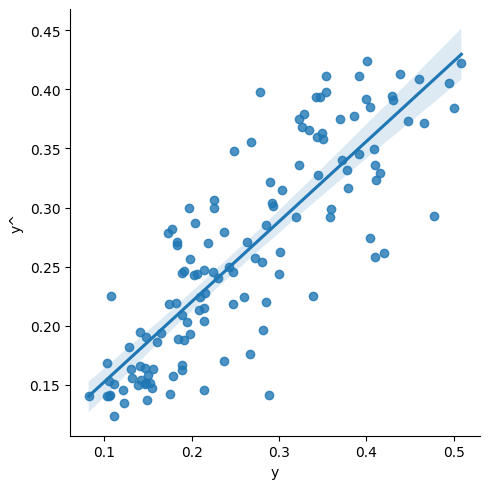

In [ ]:
sns.lmplot(data=test.sample(frac=0.01),x='y',y='y^',fit_reg=True)

In [ ]:
test

,y^,y
0,0.293580,0.197005
1,0.199260,0.250256
2,0.244906,0.252951
3,0.199528,0.183492
4,0.272531,0.403387
...,...,...
12978,0.253603,0.511298
12979,0.295209,0.282984
12980,0.162235,0.165768
12981,0.193739,0.228978


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Linear regression model**

---

In [ ]:
X= data_model2_w28[[ 'FareMiles_mean_6', 'fareSec_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
X.shape, y.shape

((43275, 5), (43275, 1))

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30292, 5), (12983, 5), (30292, 1), (12983, 1))

In [ ]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred_test)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')

RMSE test: 9.077746429633155
RMSE train: 8.985592249663412
R2 Score test: 0.5171123693375017
R2 Score train 0.5218089170341428


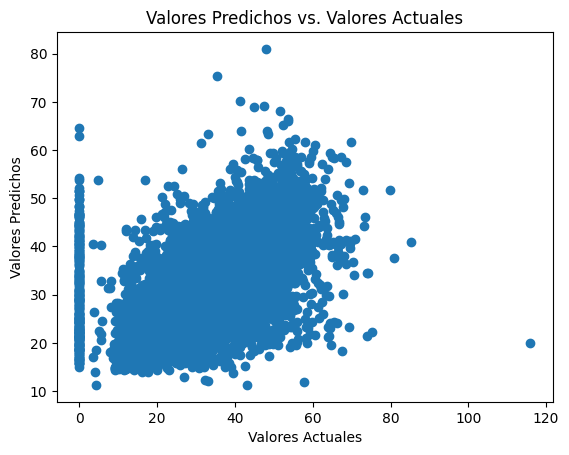

In [ ]:
# Graficar valores predichos vs. valores actuales
plt.scatter(y_test, y_pred_test)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales')
plt.show()

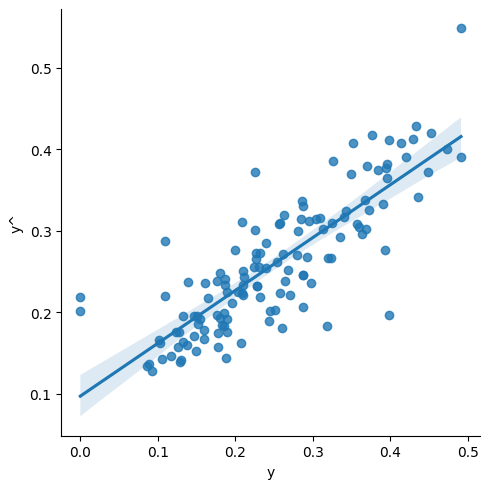

In [ ]:
sns.lmplot(data=test.sample(frac=0.01),x='y',y='y^',fit_reg=True)

In [ ]:
y_test

,target
11839,22.842778
20832,29.017222
1681,29.329670
12103,21.275932
16981,46.772692
...,...
3379,59.285000
11696,32.811957
33486,19.220750
14084,26.550000


In [ ]:
y_pred_test.shape

(12983, 1)

In [ ]:
len(y_pred_test)

12983

In [ ]:
comparaciones = pd.DataFrame(y_test).reset_index(drop=True)
comparaciones = comparaciones.assign(predictions = y_pred_test.flatten().tolist())
comparaciones.columns=['Total', 'Total_predicho']
comparaciones

,Total,Total_predicho
0,22.842778,32.165492
1,29.017222,21.854712
2,29.329670,24.142436
3,21.275932,22.477076
4,46.772692,27.686202
...,...,...
12978,59.285000,30.130236
12979,32.811957,31.320627
12980,19.220750,20.464156
12981,26.550000,21.703144


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Random Forest**

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X= data_model2_w28[[ 'FareMiles_mean_6', 'fareSec_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
X.shape, y.shape

((43275, 5), (43275, 1))

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
%%time
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo RandomForestRegressor
rf_model = RandomForestRegressor(
            n_estimators = 100,                   #número de árboles incluidos en el modelo.
            criterion    = 'squared_error',       #métrica para dividir
            max_depth    = None,                  #profundidad máxima que pueden alcanzar los árboles.
            max_features = 'auto',                #número de predictores considerados a en cada división
            oob_score    = False,                 #Si se calcula o no el out-of-bag. Si es True aumenta el tiempo de entrenamiento
            n_jobs       = -1,                    #número de cores empleados para el entrenamiento, con -1 se usan todos los disponibles
            random_state = 1                      #semilla para que los resultados sean reproducibles.
         )


rf_model.fit(X_train, y_train)

<timed exec>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: user 32.4 s, sys: 553 ms, total: 33 s
Wall time: 30.8 s


RandomForestRegressor(max_features='auto', n_jobs=-1, random_state=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')

RMSE test: 8.635711387976313
RMSE train: 3.153139102265867
R2 Score test: 0.5684026486347591
R2 Score train 0.9410053650501113


In [ ]:
y_test.shape, y_pred.shape

((8655, 1), (8655,))

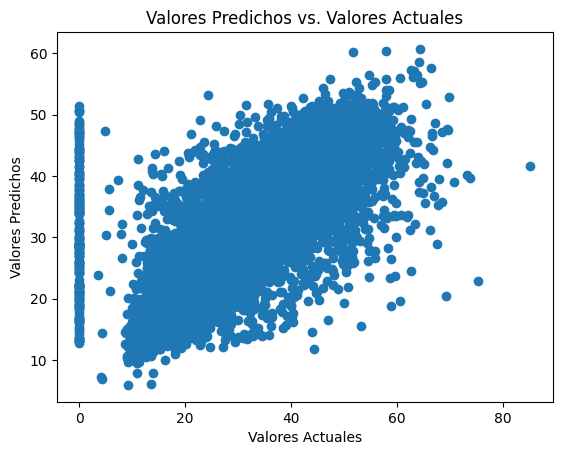

In [ ]:
# Graficar valores predichos vs. valores actuales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales')
plt.show()

In [ ]:
comparaciones = pd.DataFrame(y_test).reset_index(drop=True)
comparaciones = comparaciones.assign(predictions = y_pred.flatten().tolist())
comparaciones.columns=['Total', 'Total_predicho']
comparaciones

,Total,Total_predicho
0,22.842778,33.723556
1,29.017222,22.097057
2,29.329670,25.261916
3,21.275932,20.635360
4,46.772692,42.825557
...,...,...
8650,41.380000,27.306213
8651,36.272000,31.676786
8652,10.838085,10.411656
8653,36.854878,30.789845


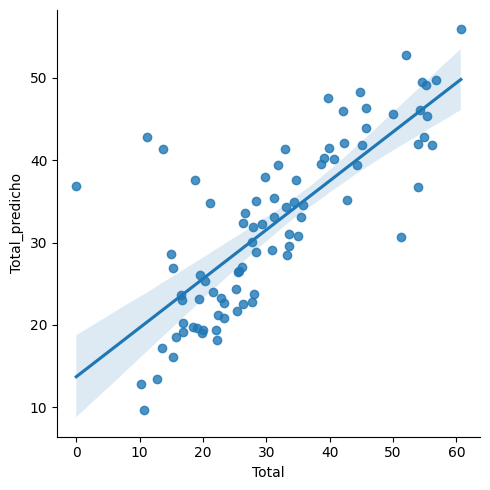

In [ ]:
sns.lmplot(data=comparaciones.sample(frac=0.01),x='Total',y='Total_predicho',fit_reg=True)


#### <font color="#3D2FB2 " FACE="futura" size = 5 > **XGBoots**

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X= data_model2_w28[[ 'FareMiles_mean_6', 'fareSec_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
%%time
# Crear y entrenar el modelo XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

CPU times: user 1.39 s, sys: 12.6 ms, total: 1.4 s
Wall time: 1.23 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

In [ ]:
# Calcular RMSE y R2
#X_train, X_test, y_train, y_test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_x = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_y = r2_score(y_test, y_pred)
r2_x = r2_score(y_train, y_pred_train)

print(f'RMSE test: {rmse_test}')
print(f'RMSE train: {rmse_x}')
print(f'R2 Score test: {r2_y}')
print(f'R2 Score train {r2_x}')

RMSE test: 8.678467883442995
RMSE train: 3.153139102265867
R2 Score test: 0.5641182828445241
R2 Score train 0.9410053650501113


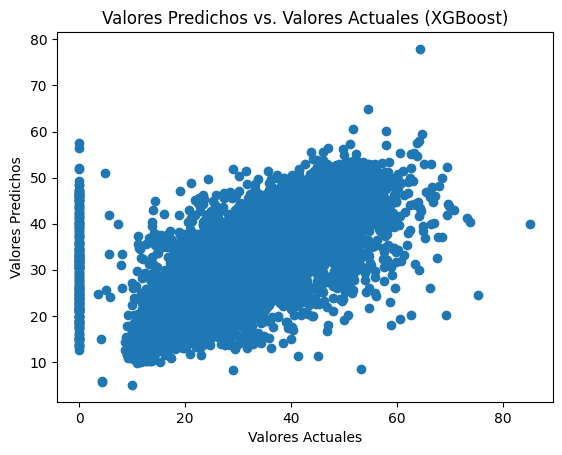

In [ ]:
# Graficar valores predichos vs. valores actuales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales (XGBoost)')
plt.show()

In [ ]:
comparaciones = pd.DataFrame(y_test).reset_index(drop=True)
comparaciones = comparaciones.assign(predictions = y_pred.flatten().tolist())
comparaciones.columns=['Total', 'Total_predicho']
comparaciones

,Total,Total_predicho
0,22.842778,33.952122
1,29.017222,22.435593
2,29.329670,27.104246
3,21.275932,21.820898
4,46.772692,53.026424
...,...,...
8650,41.380000,23.480001
8651,36.272000,32.878696
8652,10.838085,12.535687
8653,36.854878,29.563314


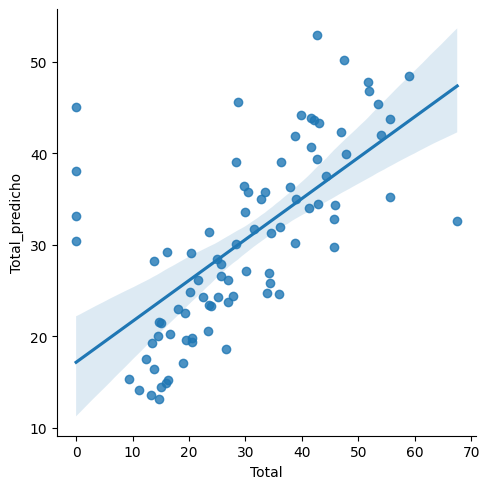

In [ ]:
sns.lmplot(data=comparaciones.sample(frac=0.01),x='Total',y='Total_predicho',fit_reg=True)

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Red Neuronal**

---

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ### para llamar a las capas densas
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X= data_model2_w28[[ 'FareMiles_mean_6', 'fareSec_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Definición del modelo
model = Sequential()  ##
## Probar capitas, multiplos de 8, 16, 32,"64 y 128"
# Primera debe tener por lo menos una neurona por cada variable,
##Va decreciendo o aumentando de forma gradual dependiendo de la capa de salida
## verificar valores jerarquicos para establecer capas
model.add(Dense(64, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1)) ### regresión una neurona de salida

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
# Definir EarlyStopping
## Solo espero 5 iteraciones cuando sigue calculando la misma función de perdida y deja de mejorar, asi evitamso el sobre ajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
%%time

#batch_size=32, probar quitarlo y poner en model.fit
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks = [early_stopping])
# model.fit(x=Xs_train, y=y_train, epochs=600, validation_data=(Xs_val, y_val), verbose=1, callbacks=[early_stop])

Epoch 1/100
1082/1082 [==============================] - 3s 2ms/step - loss: 368.4944 - val_loss: 102.1599
Epoch 2/100
1082/1082 [==============================] - 3s 3ms/step - loss: 88.0689 - val_loss: 88.5780
Epoch 3/100
1082/1082 [==============================] - 3s 3ms/step - loss: 82.0887 - val_loss: 86.9785
Epoch 4/100
1082/1082 [==============================] - 2s 2ms/step - loss: 81.0688 - val_loss: 85.5092
Epoch 5/100
1082/1082 [==============================] - 2s 2ms/step - loss: 80.5282 - val_loss: 84.9403
Epoch 6/100
1082/1082 [==============================] - 2s 2ms/step - loss: 80.1879 - val_loss: 84.4512
Epoch 7/100
1082/1082 [==============================] - 2s 2ms/step - loss: 79.8852 - val_loss: 84.0601
Epoch 8/100
1082/1082 [==============================] - 3s 3ms/step - loss: 79.6082 - val_loss: 83.8322
Epoch 9/100
1082/1082 [==============================] - 3s 3ms/step - loss: 79.3575 - val_loss: 83.4761
Epoch 10/100
1082/1082 [=============================

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

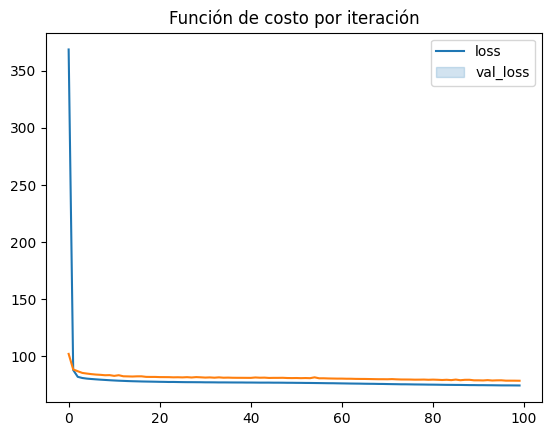

In [ ]:

sns.lineplot(x=range(len(loss)), y=loss)
sns.lineplot(x=range(len(loss)), y=val_loss)
plt.legend(['loss', 'val_loss'])
plt.title("Función de costo por iteración");

In [ ]:
### Despues puedo saltar a calcular las predicciones de los valores de Xs_train y Xs_test

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

271/271 [==============================] - 0s 1ms/step


In [ ]:
training_score = model.evaluate(X_train, y_train, verbose=0)
validation_score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
training_score

74.49420928955078

In [ ]:
validation_score

78.65754699707031

#### <font color="#3D2FB2 " FACE="futura" size = 5 > **Red Neuronal 2**

---

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ### para llamar a las capas densas
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X= data_model2_w28[[ 'FareMiles_mean_6', 'fareSec_mean_6','extras_mean_6',
        'Ptips_mean_6',
       'Ptolls_mean_6']]
y= data_model2_w28[['target']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Dado que hay mucha discrepancia entre los valores de uan variable y otra, los grandes números dominarán sobre los pequeños, entonces estandarizamos
scaler = MinMaxScaler()
# Realizar el reescalado de las variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Definición del modelo
model = Sequential()  ##
## Probar capitas, multiplos de 8, 16, 32,"64 y 128"
# Primera debe tener por lo menos una neurona por cada variable,
##Va decreciendo o aumentando de forma gradual dependiendo de la capa de salida
## verificar valores jerarquicos para establecer capas
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) ### regresión una neurona de salida

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
# Definir EarlyStopping
## Solo espero 5 iteraciones cuando sigue calculando la misma función de perdida y deja de mejorar, asi evitamso el sobre ajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
%%time

#batch_size=32, probar quitarlo y poner en model.fit
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks = [early_stopping])
# model.fit(x=Xs_train, y=y_train, epochs=600, validation_data=(Xs_val, y_val), verbose=1, callbacks=[early_stop])

Epoch 1/100
1082/1082 [==============================] - 3s 2ms/step - loss: 333.3361 - val_loss: 92.8335
Epoch 2/100
1082/1082 [==============================] - 3s 2ms/step - loss: 83.0822 - val_loss: 87.1956
Epoch 3/100
1082/1082 [==============================] - 3s 2ms/step - loss: 81.0403 - val_loss: 86.3778
Epoch 4/100
1082/1082 [==============================] - 3s 3ms/step - loss: 80.6540 - val_loss: 85.2068
Epoch 5/100
1082/1082 [==============================] - 3s 3ms/step - loss: 80.4355 - val_loss: 84.5783
Epoch 6/100
1082/1082 [==============================] - 3s 2ms/step - loss: 80.1194 - val_loss: 84.0285
Epoch 7/100
1082/1082 [==============================] - 3s 2ms/step - loss: 79.7213 - val_loss: 83.5779
Epoch 8/100
1082/1082 [==============================] - 3s 2ms/step - loss: 79.3011 - val_loss: 83.1042
Epoch 9/100
1082/1082 [==============================] - 2s 2ms/step - loss: 78.8368 - val_loss: 82.6915
Epoch 10/100
1082/1082 [==============================

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

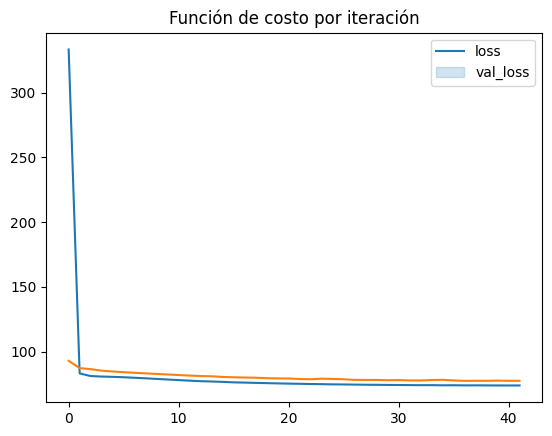

In [ ]:

sns.lineplot(x=range(len(loss)), y=loss)
sns.lineplot(x=range(len(loss)), y=val_loss)
plt.legend(['loss', 'val_loss'])
plt.title("Función de costo por iteración");

In [ ]:
### Despues puedo saltar a calcular las predicciones de los valores de Xs_train y Xs_test

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

271/271 [==============================] - 0s 1ms/step


In [ ]:
training_score = model.evaluate(X_train, y_train, verbose=0)
validation_score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
training_score

73.60871124267578

In [ ]:
validation_score

77.34838104248047

De los tres análisis de variables que se tomaron en cuenta para mejorar los modelos, este último presenta una mejora significativa con una r2 de 77% de efectividad diseñado con una red neuronal.    
Se decide realizar el mismo procedimiento tomando ventanas de tiempo de 6 semanas y tomas la 7 como target, para observar si se tiene una mejora en el comportamiento del modelo. Sin embargo, los resultados son parecido a los proporcionados por los modelos de ventanas de tiempo de 3 semanas.